In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Indian_Kids_Screentime.csv')
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3218
Urban_or_Rural                          0
dtype: int64


In [3]:
df.head(1149)

Age  Gender  Avg_Daily_Screen_Time_hr Primary_Device  \
0      14    Male                      3.99     Smartphone   
1      11  Female                      4.61         Laptop   
2      18  Female                      3.73             TV   
3      15  Female                      1.21         Laptop   
4      12  Female                      5.89     Smartphone   
...   ...     ...                       ...            ...   
1144   13    Male                      2.93             TV   
1145   12    Male                      4.66             TV   
1146   15  Female                      3.28         Laptop   
1147    8  Female                      2.12             TV   
1148    8    Male                      7.16     Smartphone   

      Exceeded_Recommended_Limit  Educational_to_Recreational_Ratio  \
0                           True                               0.42   
1                           True                               0.30   
2                           True                               0.32   
3                          False                               0.39   
4                           True                               0.49   
...                          ...                                ...   
1144                       False                               0.36   
1145                        True                               0.46   
1146                        True                               0.48   
1147                        True                               0.54   
1148                        True                               0.53   

              Health_Impacts Urban_or_Rural  
0     Poor Sleep, Eye Strain          Urban  
1                 Poor Sleep          Urban  
2                 Poor Sleep          Urban  
3                        NaN          Urban  
4        Poor Sleep, Anxiety          Urban  
...                      ...            ...  
1144                     NaN          Rural  
1145              Poor Sleep          Rural  
1146              Eye Strain          Urban  
1147                     NaN          Urban  
1148  Poor Sleep, Eye Strain          Rural  

[1149 rows x 8 columns]

In [4]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3218
Urban_or_Rural                          0
dtype: int64


In [5]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 64.65it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
df = df.drop_duplicates()

In [7]:
df_numeric = df.copy()

In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3252\372679728.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder.fit_transform(df['Gender'])


In [9]:
df['Primary_Device'] = label_encoder.fit_transform(df['Primary_Device'])  # 0, 1, 2, 3 for devices

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3252\2730151531.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Primary_Device'] = label_encoder.fit_transform(df['Primary_Device'])  # 0, 1, 2, 3 for devices


In [10]:
df['Urban_or_Rural'] = label_encoder.fit_transform(df['Urban_or_Rural'])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3252\3153116329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Urban_or_Rural'] = label_encoder.fit_transform(df['Urban_or_Rural'])


In [11]:
from sklearn.experimental import enable_iterative_imputer  # Necessary for Iterative Imputer
from sklearn.impute import IterativeImputer

In [12]:
if 'Health_Impacts' in df.columns:
    health_impact_dummies = df['Health_Impacts'].str.get_dummies(sep=', ')
    
    df = pd.concat([df, health_impact_dummies], axis=1)
    df.drop(columns=['Health_Impacts'], inplace=True)

iter_imputer = IterativeImputer(max_iter=10, random_state=42)

health_impact_columns = health_impact_dummies.columns 

df[health_impact_columns] = iter_imputer.fit_transform(df[health_impact_columns])

df[health_impact_columns] = df[health_impact_columns].astype(int)

In [13]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
df_numeric = pd.get_dummies(df, columns=categorical_columns, drop_first=True)


In [14]:
print("\nMissing Values After Imputation:")
print(df.isnull().sum())


Missing Values After Imputation:
Age                                  0
Gender                               0
Avg_Daily_Screen_Time_hr             0
Primary_Device                       0
Exceeded_Recommended_Limit           0
Educational_to_Recreational_Ratio    0
Urban_or_Rural                       0
Anxiety                              0
Eye Strain                           0
Obesity Risk                         0
Poor Sleep                           0
dtype: int64


In [15]:
df.head()

Age  Gender  Avg_Daily_Screen_Time_hr  Primary_Device  \
0   14       1                      3.99               1   
1   11       0                      4.61               0   
2   18       0                      3.73               2   
3   15       0                      1.21               0   
4   12       0                      5.89               1   

   Exceeded_Recommended_Limit  Educational_to_Recreational_Ratio  \
0                        True                               0.42   
1                        True                               0.30   
2                        True                               0.32   
3                       False                               0.39   
4                        True                               0.49   

   Urban_or_Rural  Anxiety  Eye Strain  Obesity Risk  Poor Sleep  
0               1        0           1             0           1  
1               1        0           0             0           1  
2               1        0           0             0           1  
3               1        0           0             0           0  
4               1        1           0             0           1

Heap Map Correlation Between different features

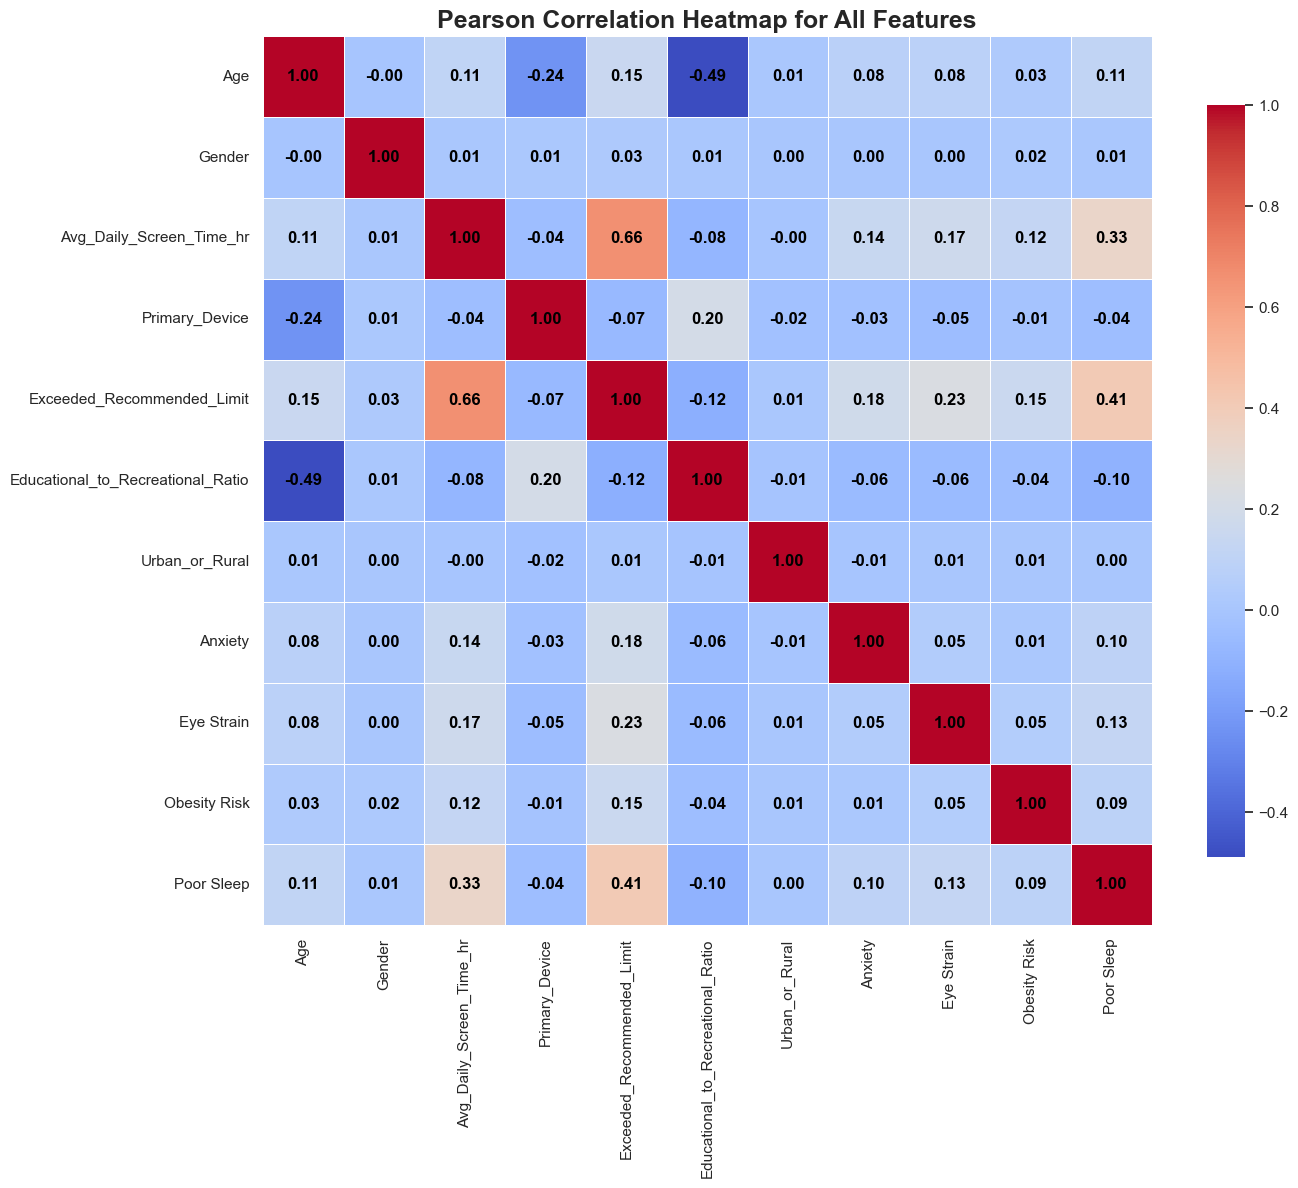

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_numeric = df.copy()

categorical_columns = df.select_dtypes(include=['object', 'category']).columns
df_numeric = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

correlation_matrix = df_numeric.corr()


sns.set(style="white", palette="muted")

plt.figure(figsize=(14, 12))

sns.heatmap(
    correlation_matrix,  
    annot=True,          
    cmap='coolwarm',     
    fmt='.2f',           
    linewidths=0.5,      
    cbar_kws={'shrink': 0.8},  
    annot_kws={"size": 12, "weight": "bold", "color": "black"}, 
    square=True,          
    linecolor='white',    
    xticklabels=correlation_matrix.columns,  
    yticklabels=correlation_matrix.columns  
)

plt.title("Pearson Correlation Heatmap for All Features", fontsize=18, fontweight='bold')
plt.tight_layout()

plt.savefig('correlation_heatmap.png', format='png')

plt.show()



Dropping the highly corelated feature with target to reduce overfitting and dataleakage

In [17]:
df = df.drop(columns=['Avg_Daily_Screen_Time_hr'])

In [18]:
df.head()

Age  Gender  Primary_Device  Exceeded_Recommended_Limit  \
0   14       1               1                        True   
1   11       0               0                        True   
2   18       0               2                        True   
3   15       0               0                       False   
4   12       0               1                        True   

   Educational_to_Recreational_Ratio  Urban_or_Rural  Anxiety  Eye Strain  \
0                               0.42               1        0           1   
1                               0.30               1        0           0   
2                               0.32               1        0           0   
3                               0.39               1        0           0   
4                               0.49               1        1           0   

   Obesity Risk  Poor Sleep  
0             0           1  
1             0           1  
2             0           1  
3             0           0  
4             0           1

Setting 'Exceeded_Recommended_Limit' as target and dropping it simultaneously

In [19]:
X = df.drop(columns=['Exceeded_Recommended_Limit'])
y = df['Exceeded_Recommended_Limit']

In [20]:
from scipy.stats import f_oneway  

p_values = {}

for column in X.select_dtypes(include=['int64', 'float64']).columns:
    groups = [X[column][y == 0], X[column][y == 1]] 
    f_stat, p_value = f_oneway(*groups)
    p_values[column] = p_value

print("\nP-values for each feature based on ANOVA:")
for feature, p_value in p_values.items():
    print(f"{feature}: p-value = {p_value:.4f}")

selected_features = [feature for feature, p_value in p_values.items() if p_value < 0.05]

print("\nSelected Features based on ANOVA (p-value < 0.05):")
print(selected_features)


P-values for each feature based on ANOVA:
Age: p-value = 0.0000
Gender: p-value = 0.0082
Primary_Device: p-value = 0.0000
Educational_to_Recreational_Ratio: p-value = 0.0000
Urban_or_Rural: p-value = 0.5139
Anxiety: p-value = 0.0000
Eye Strain: p-value = 0.0000
Obesity Risk: p-value = 0.0000
Poor Sleep: p-value = 0.0000

Selected Features based on ANOVA (p-value < 0.05):
['Age', 'Gender', 'Primary_Device', 'Educational_to_Recreational_Ratio', 'Anxiety', 'Eye Strain', 'Obesity Risk', 'Poor Sleep']


C:\Users\ASUS\AppData\Local\Temp\ipykernel_3252\1074318676.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='P-value', y='Feature', data=p_values_df, palette="viridis")


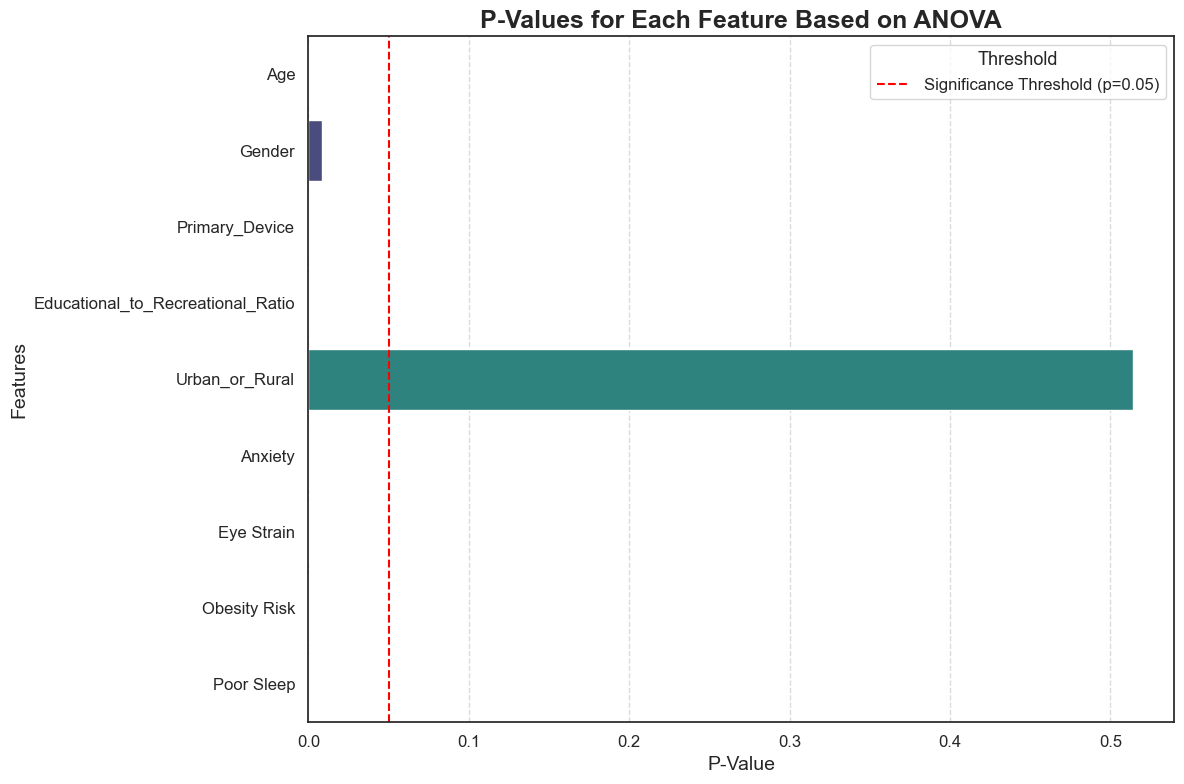

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

features = ['Age', 'Gender', 'Primary_Device', 'Educational_to_Recreational_Ratio', 
            'Urban_or_Rural', 'Anxiety', 'Eye Strain', 'Obesity Risk', 'Poor Sleep']

p_values = [0.0000, 0.0082, 0.0000, 0.0000, 0.5139, 0.0000, 0.0000, 0.0000, 0.0000]

p_values_df = pd.DataFrame({
    'Feature': features,
    'P-value': p_values
})

plt.figure(figsize=(12, 8))

sns.barplot(x='P-value', y='Feature', data=p_values_df, palette="viridis")

plt.axvline(x=0.05, color='red', linestyle='--', label='Significance Threshold (p=0.05)')

plt.title("P-Values for Each Feature Based on ANOVA", fontsize=18, fontweight='bold')
plt.xlabel("P-Value", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(fontsize=12, title="Threshold", title_fontsize='13')

plt.grid(True, axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig("anova_p_value_plot.png", dpi=300, bbox_inches='tight')  # Save with high resolution

plt.show()


Importing the libraries needed for data preprocessing, feature scaling, train_test_split, StratifiedKFold, cross_val_score, GridSearchCV and RandomizedSearchCV

In [22]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV

Splitting the data into train test set 

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

"0" = LAPTOP, 
"1" = SMARTPHONE, 
"2" = TV, 
"3" = TABLET

In [24]:
X_train.head()

Age  Gender  Primary_Device  Educational_to_Recreational_Ratio  \
664    13       0               1                               0.47   
8723   13       0               1                               0.50   
3393   11       0               1                               0.50   
841    17       0               1                               0.39   
7539   10       0               2                               0.53   

      Urban_or_Rural  Anxiety  Eye Strain  Obesity Risk  Poor Sleep  
664                1        0           1             0           0  
8723               1        0           1             0           1  
3393               1        0           1             0           1  
841                1        0           0             0           1  
7539               1        0           0             0           1

In [25]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Age                                  0
Gender                               0
Primary_Device                       0
Exceeded_Recommended_Limit           0
Educational_to_Recreational_Ratio    0
Urban_or_Rural                       0
Anxiety                              0
Eye Strain                           0
Obesity Risk                         0
Poor Sleep                           0
dtype: int64


In [26]:
scaler = MinMaxScaler()
X_train[['Age']] = scaler.fit_transform(X_train[['Age']])  
X_test[['Age']] = scaler.transform(X_test[['Age']])

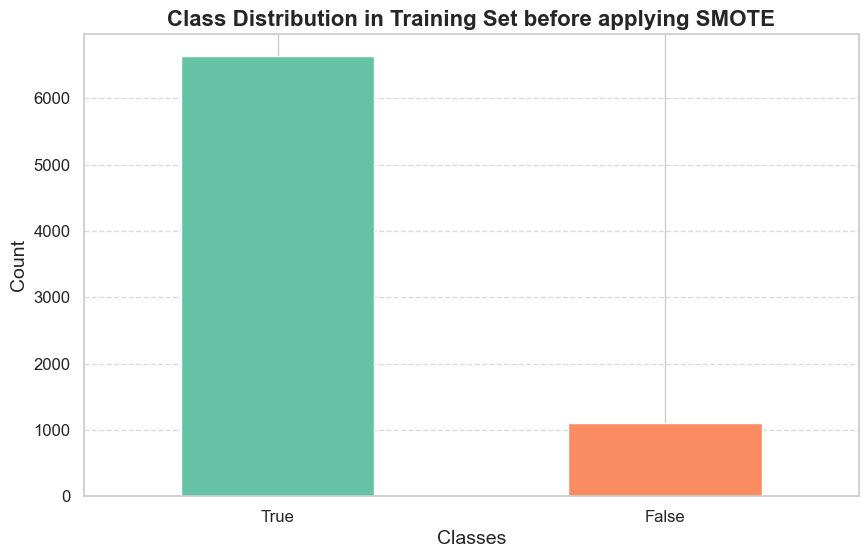

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
ax = y_train.value_counts().plot(kind='bar', color=sns.color_palette("Set2", n_colors=len(y_train.value_counts())))

plt.title("Class Distribution in Training Set before applying SMOTE", fontsize=16, fontweight='bold')
plt.xlabel("Classes", fontsize=14)
plt.ylabel("Count", fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(rotation=0, fontsize=12)  
plt.yticks(fontsize=12)

plt.savefig("class_distribution_training_set.png", dpi=300, bbox_inches="tight")
plt.show()


In [28]:
X_test.head(10)

Age  Gender  Primary_Device  Educational_to_Recreational_Ratio  \
5204  0.4       1               1                               0.41   
2391  0.5       0               0                               0.31   
7705  0.5       0               1                               0.43   
2278  0.2       0               1                               0.48   
4279  0.9       0               0                               0.44   
5586  0.7       0               0                               0.39   
7844  0.8       0               3                               0.47   
4446  0.4       0               1                               0.34   
8648  0.7       0               3                               0.34   
2004  0.9       0               1                               0.44   

      Urban_or_Rural  Anxiety  Eye Strain  Obesity Risk  Poor Sleep  
5204               1        0           1             0           1  
2391               0        0           0             0           1  
7705               1        0           1             0           1  
2278               1        0           0             0           0  
4279               0        0           0             0           1  
5586               1        1           0             0           1  
7844               1        0           0             0           0  
4446               1        0           0             0           0  
8648               1        0           0             0           1  
2004               1        0           0             0           0

In [29]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

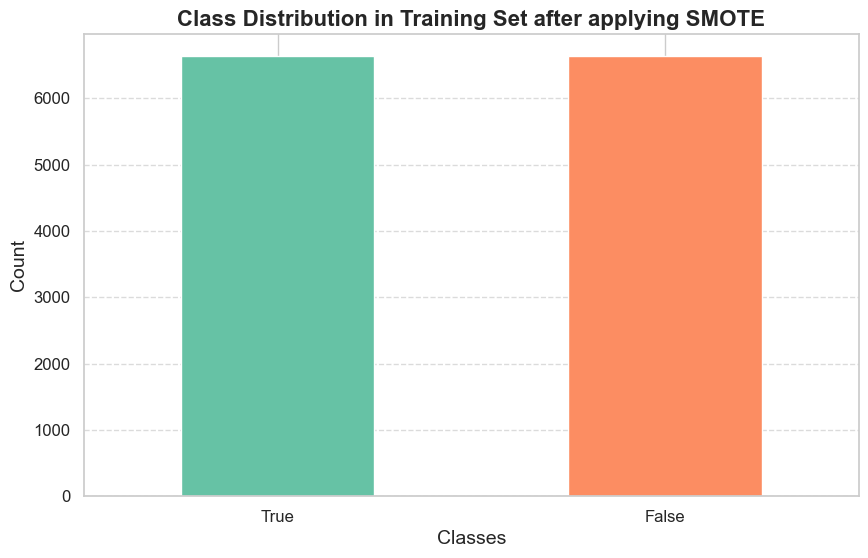

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
ax = y_train_resampled.value_counts().plot(kind='bar', color=sns.color_palette("Set2", n_colors=len(y_train_resampled.value_counts())))

plt.title("Class Distribution in Training Set after applying SMOTE", fontsize=16, fontweight='bold')
plt.xlabel("Classes", fontsize=14)
plt.ylabel("Count", fontsize=14)


plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(rotation=0, fontsize=12)  
plt.yticks(fontsize=12)

plt.savefig("class_distribution_training_set_after_smote.png", dpi=300, bbox_inches="tight")

plt.show()


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_auc_score



Classification Report for Logistic Regression:
               precision    recall  f1-score   support

       False       0.44      1.00      0.61       274
        True       1.00      0.79      0.88      1660

    accuracy                           0.82      1934
   macro avg       0.72      0.89      0.74      1934
weighted avg       0.92      0.82      0.84      1934

Confusion Matrix for Logistic Regression:
 [[ 274    0]
 [ 354 1306]]


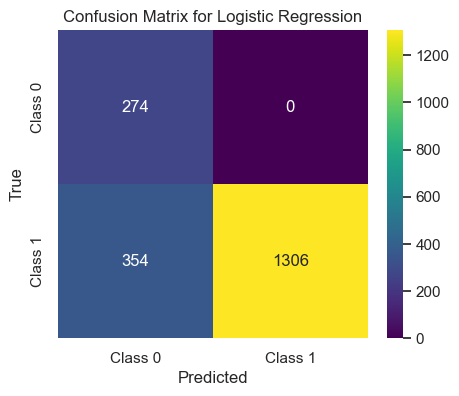


Classification Report for Decision Tree:
               precision    recall  f1-score   support

       False       0.45      0.54      0.49       274
        True       0.92      0.89      0.91      1660

    accuracy                           0.84      1934
   macro avg       0.68      0.72      0.70      1934
weighted avg       0.85      0.84      0.85      1934

Confusion Matrix for Decision Tree:
 [[ 149  125]
 [ 184 1476]]


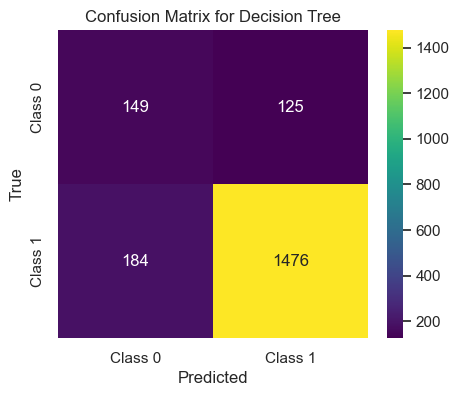


Classification Report for Random Forest:
               precision    recall  f1-score   support

       False       0.44      0.55      0.49       274
        True       0.92      0.88      0.90      1660

    accuracy                           0.84      1934
   macro avg       0.68      0.72      0.70      1934
weighted avg       0.86      0.84      0.85      1934

Confusion Matrix for Random Forest:
 [[ 152  122]
 [ 192 1468]]


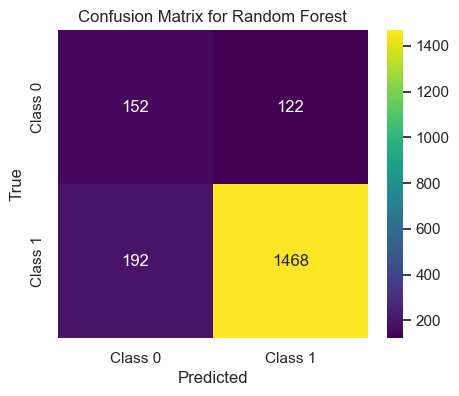


Classification Report for Gradient Boosting:
               precision    recall  f1-score   support

       False       0.43      0.97      0.60       274
        True       0.99      0.79      0.88      1660

    accuracy                           0.82      1934
   macro avg       0.71      0.88      0.74      1934
weighted avg       0.91      0.82      0.84      1934

Confusion Matrix for Gradient Boosting:
 [[ 265    9]
 [ 346 1314]]


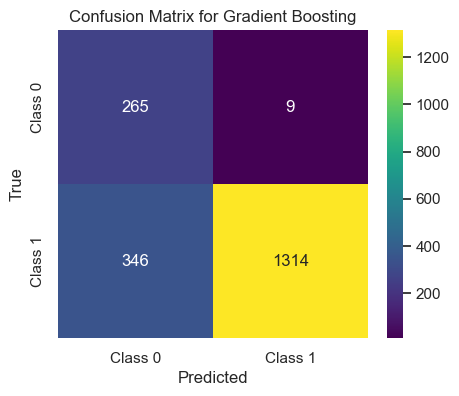


Classification Report for AdaBoost:
               precision    recall  f1-score   support

       False       0.44      1.00      0.61       274
        True       1.00      0.79      0.88      1660

    accuracy                           0.82      1934
   macro avg       0.72      0.89      0.74      1934
weighted avg       0.92      0.82      0.84      1934

Confusion Matrix for AdaBoost:
 [[ 274    0]
 [ 354 1306]]


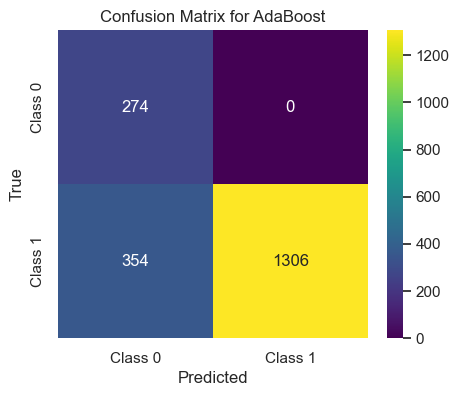


Classification Report for Naive Bayes:
               precision    recall  f1-score   support

       False       0.44      1.00      0.61       274
        True       1.00      0.79      0.88      1660

    accuracy                           0.82      1934
   macro avg       0.72      0.89      0.74      1934
weighted avg       0.92      0.82      0.84      1934

Confusion Matrix for Naive Bayes:
 [[ 274    0]
 [ 354 1306]]


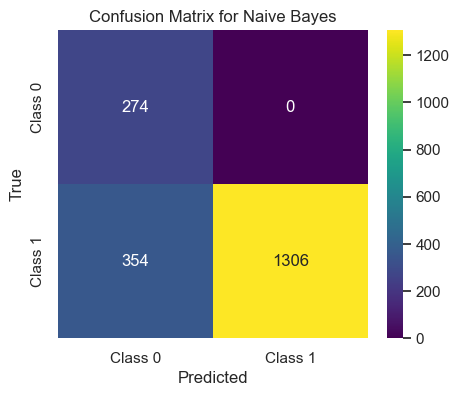


Classification Report for SVM:
               precision    recall  f1-score   support

       False       0.44      1.00      0.61       274
        True       1.00      0.79      0.88      1660

    accuracy                           0.82      1934
   macro avg       0.72      0.89      0.74      1934
weighted avg       0.92      0.82      0.84      1934

Confusion Matrix for SVM:
 [[ 274    0]
 [ 354 1306]]


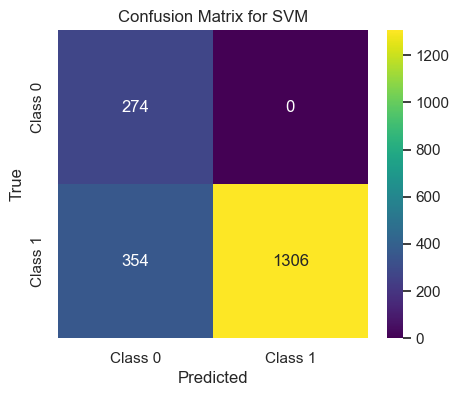


Classification Report for XGBoost:
               precision    recall  f1-score   support

       False       0.46      0.69      0.55       274
        True       0.94      0.87      0.90      1660

    accuracy                           0.84      1934
   macro avg       0.70      0.78      0.73      1934
weighted avg       0.87      0.84      0.85      1934

Confusion Matrix for XGBoost:
 [[ 188   86]
 [ 222 1438]]


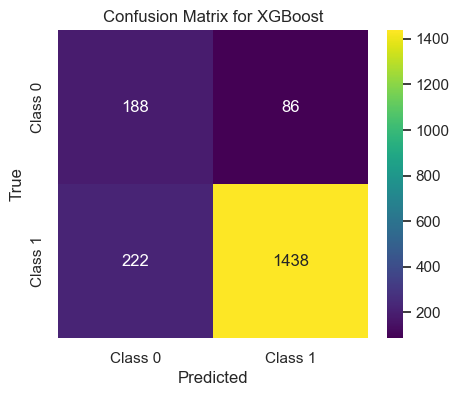

In [32]:
import os 

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(probability=True),
    "XGBoost": XGBClassifier(enable_categorical=True)
}

model_performance = {}


save_dir = "confusion_matrices"
os.makedirs(save_dir, exist_ok=True)

for model_name, model in models.items():

    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    model_performance[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc
    }

    print(f"\nClassification Report for {model_name}:\n", classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {model_name}:\n", cm)

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    save_path = os.path.join(save_dir, f'{model_name}_confusion_matrix.png')
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    plt.show()
model_performance_df = pd.DataFrame(model_performance).T




Model Performance with Train-Test Split:
                     Accuracy  Precision    Recall  F1 Score   ROC AUC
Logistic Regression  0.816960   1.000000  0.786747  0.880647  0.909344
Decision Tree        0.840228   0.921924  0.889157  0.905244  0.747886
Random Forest        0.837642   0.923270  0.884337  0.903385  0.895105
Gradient Boosting    0.816443   0.993197  0.791566  0.880992  0.908947
AdaBoost             0.816960   1.000000  0.786747  0.880647  0.893373
Naive Bayes          0.816960   1.000000  0.786747  0.880647  0.908190
SVM                  0.816960   1.000000  0.786747  0.880647  0.900158
XGBoost              0.840745   0.943570  0.866265  0.903266  0.904591


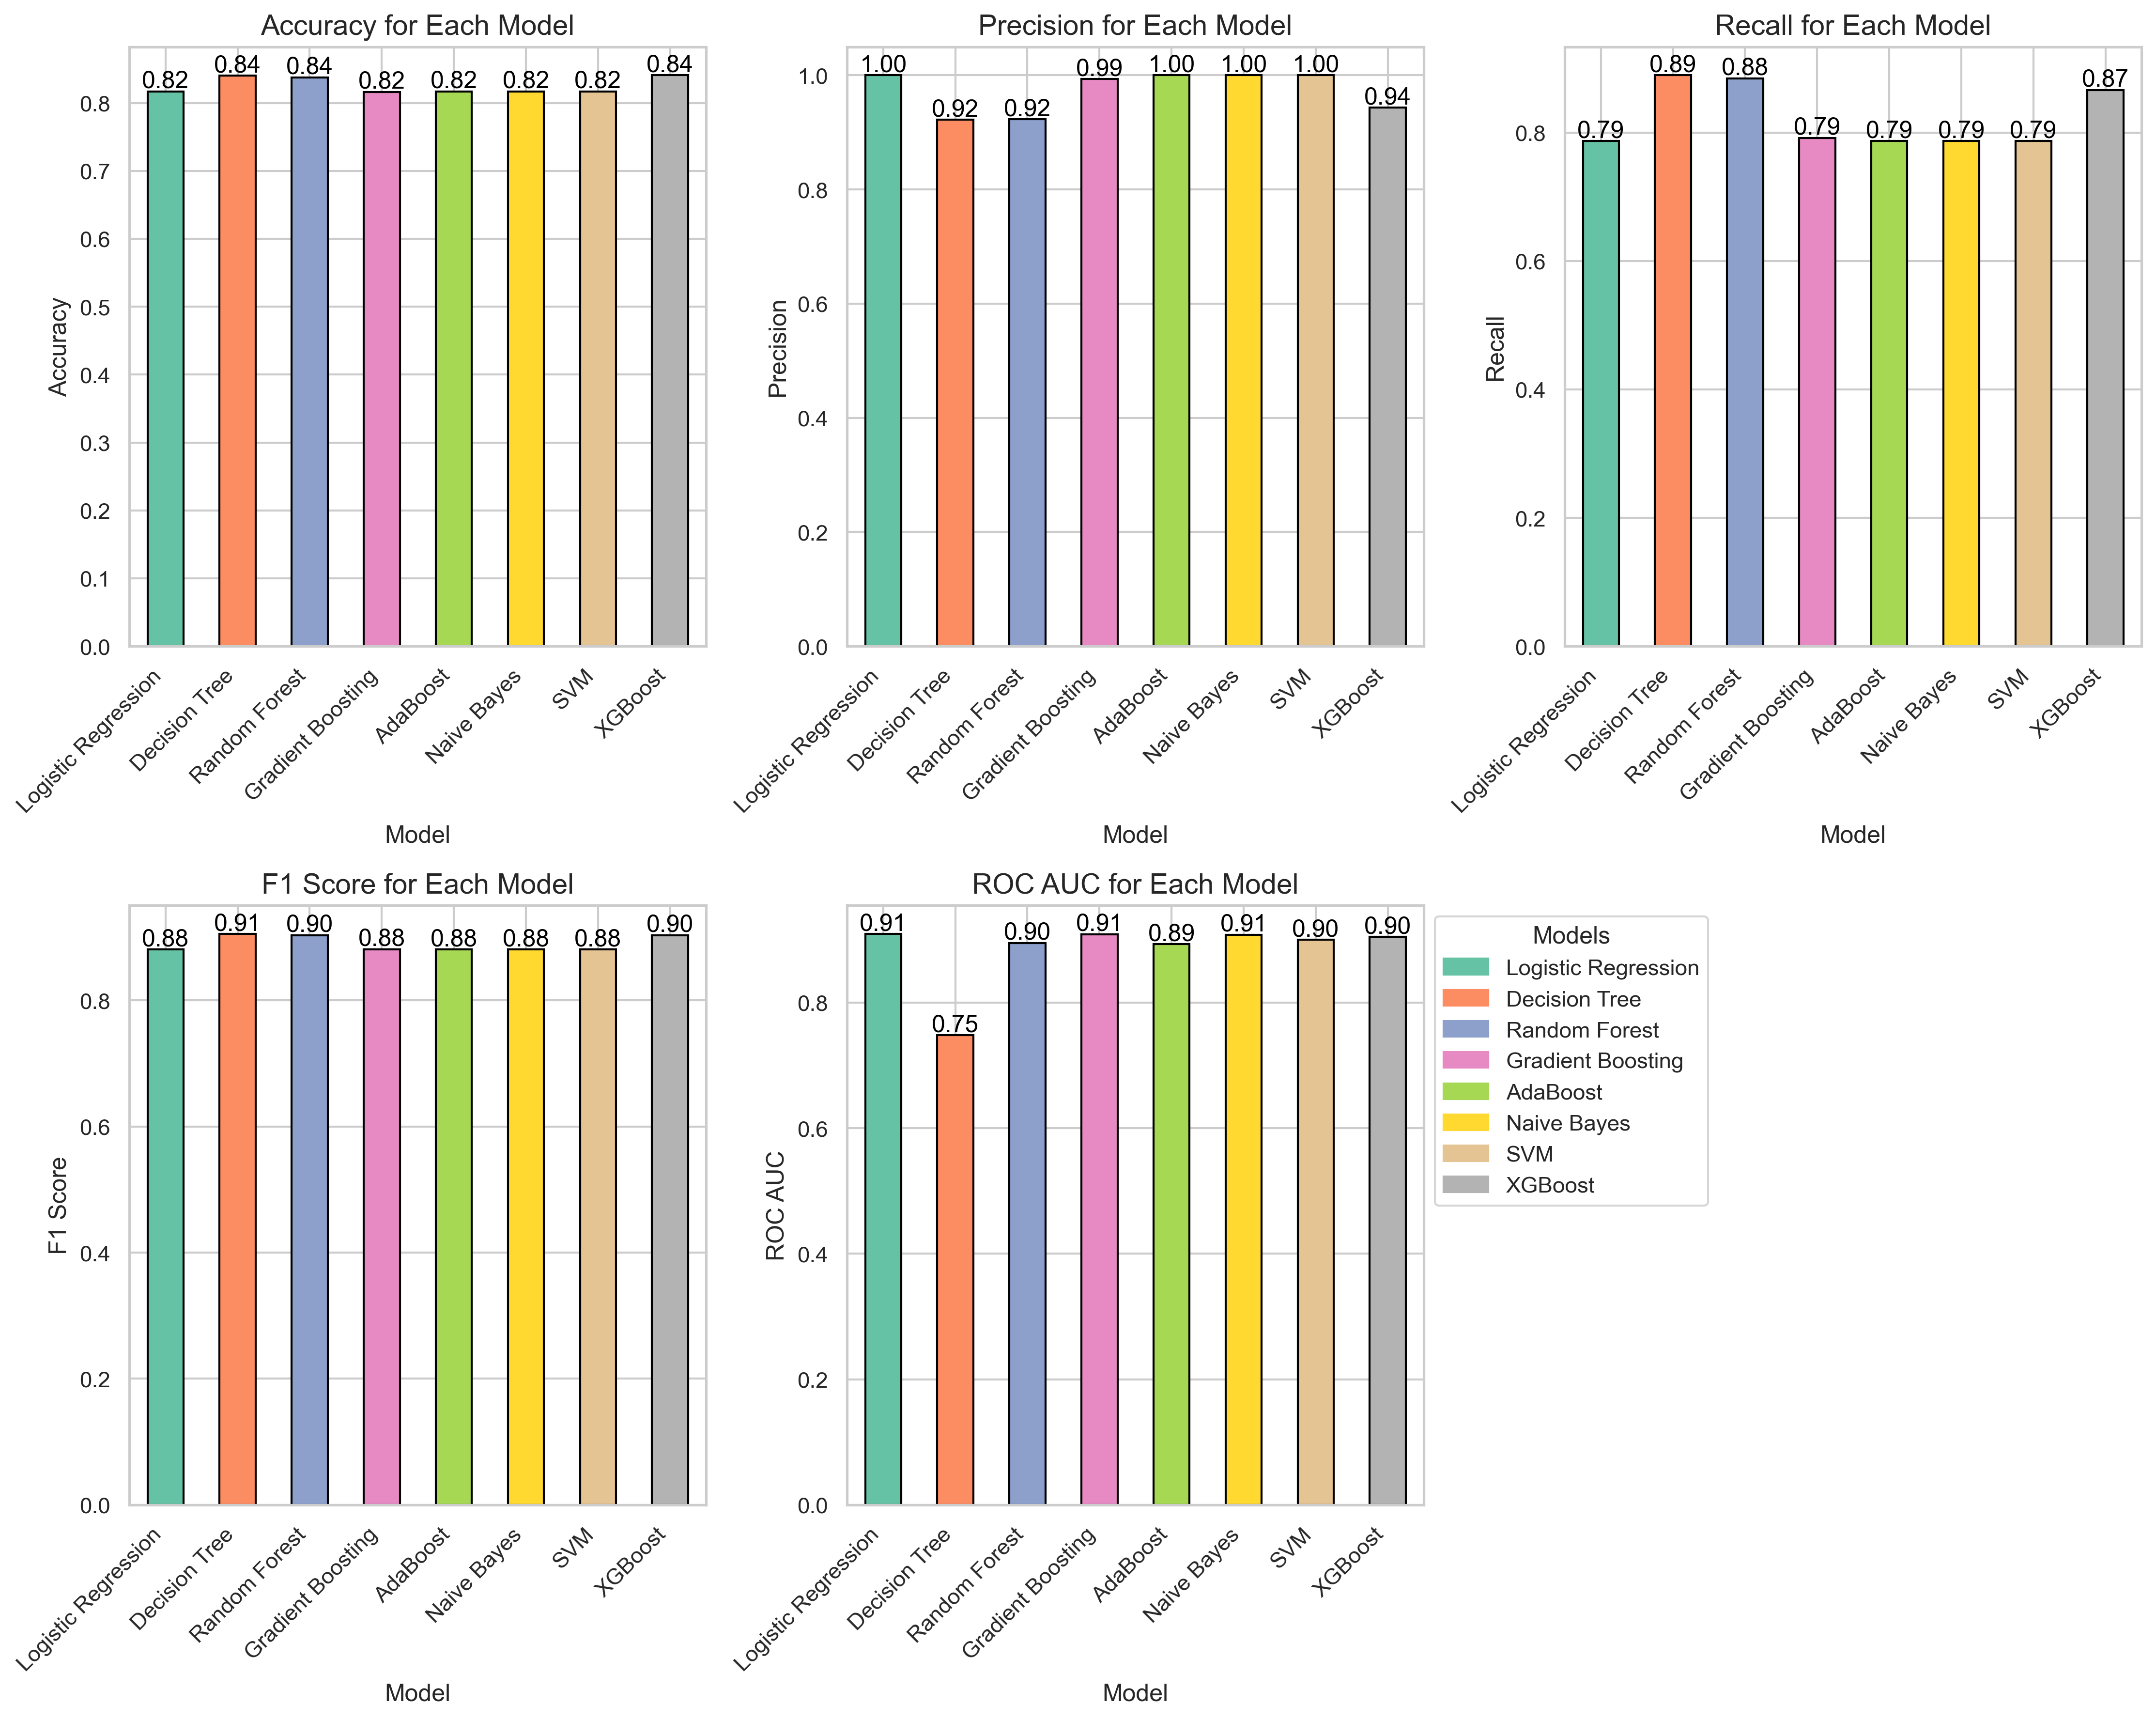

In [33]:
model_performance_df = pd.DataFrame(model_performance).T


print("\nModel Performance with Train-Test Split:")
print(model_performance_df)

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']

import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

save_dir = "model_performance_plots"
os.makedirs(save_dir, exist_ok=True)

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
model_names = model_performance_df.index.tolist() 

sns.set(style="whitegrid")

plt.figure(figsize=(15, 12), dpi=300)

colors = sns.color_palette("Set2", n_colors=len(model_performance_df))
for idx, metric in enumerate(metrics):
    plt.subplot(2, 3, idx + 1)  
    ax = model_performance_df[metric].plot(kind='bar', color=colors, edgecolor='black')

    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    fontsize=12, color='black', 
                    xytext=(0, 5), textcoords='offset points')

    plt.title(f'{metric} for Each Model', fontsize=14)
    plt.xlabel('Model', fontsize=12)
    plt.ylabel(f'{metric}', fontsize=12)
    plt.xticks(rotation=45, ha='right') 
    plt.tight_layout()

handles = [plt.Rectangle((0, 0), 1, 1, color=colors[i]) for i in range(len(model_names))]
plt.legend(handles, model_names, title="Models", loc='upper left', bbox_to_anchor=(1, 1))
save_path = os.path.join(save_dir, 'model_performance.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

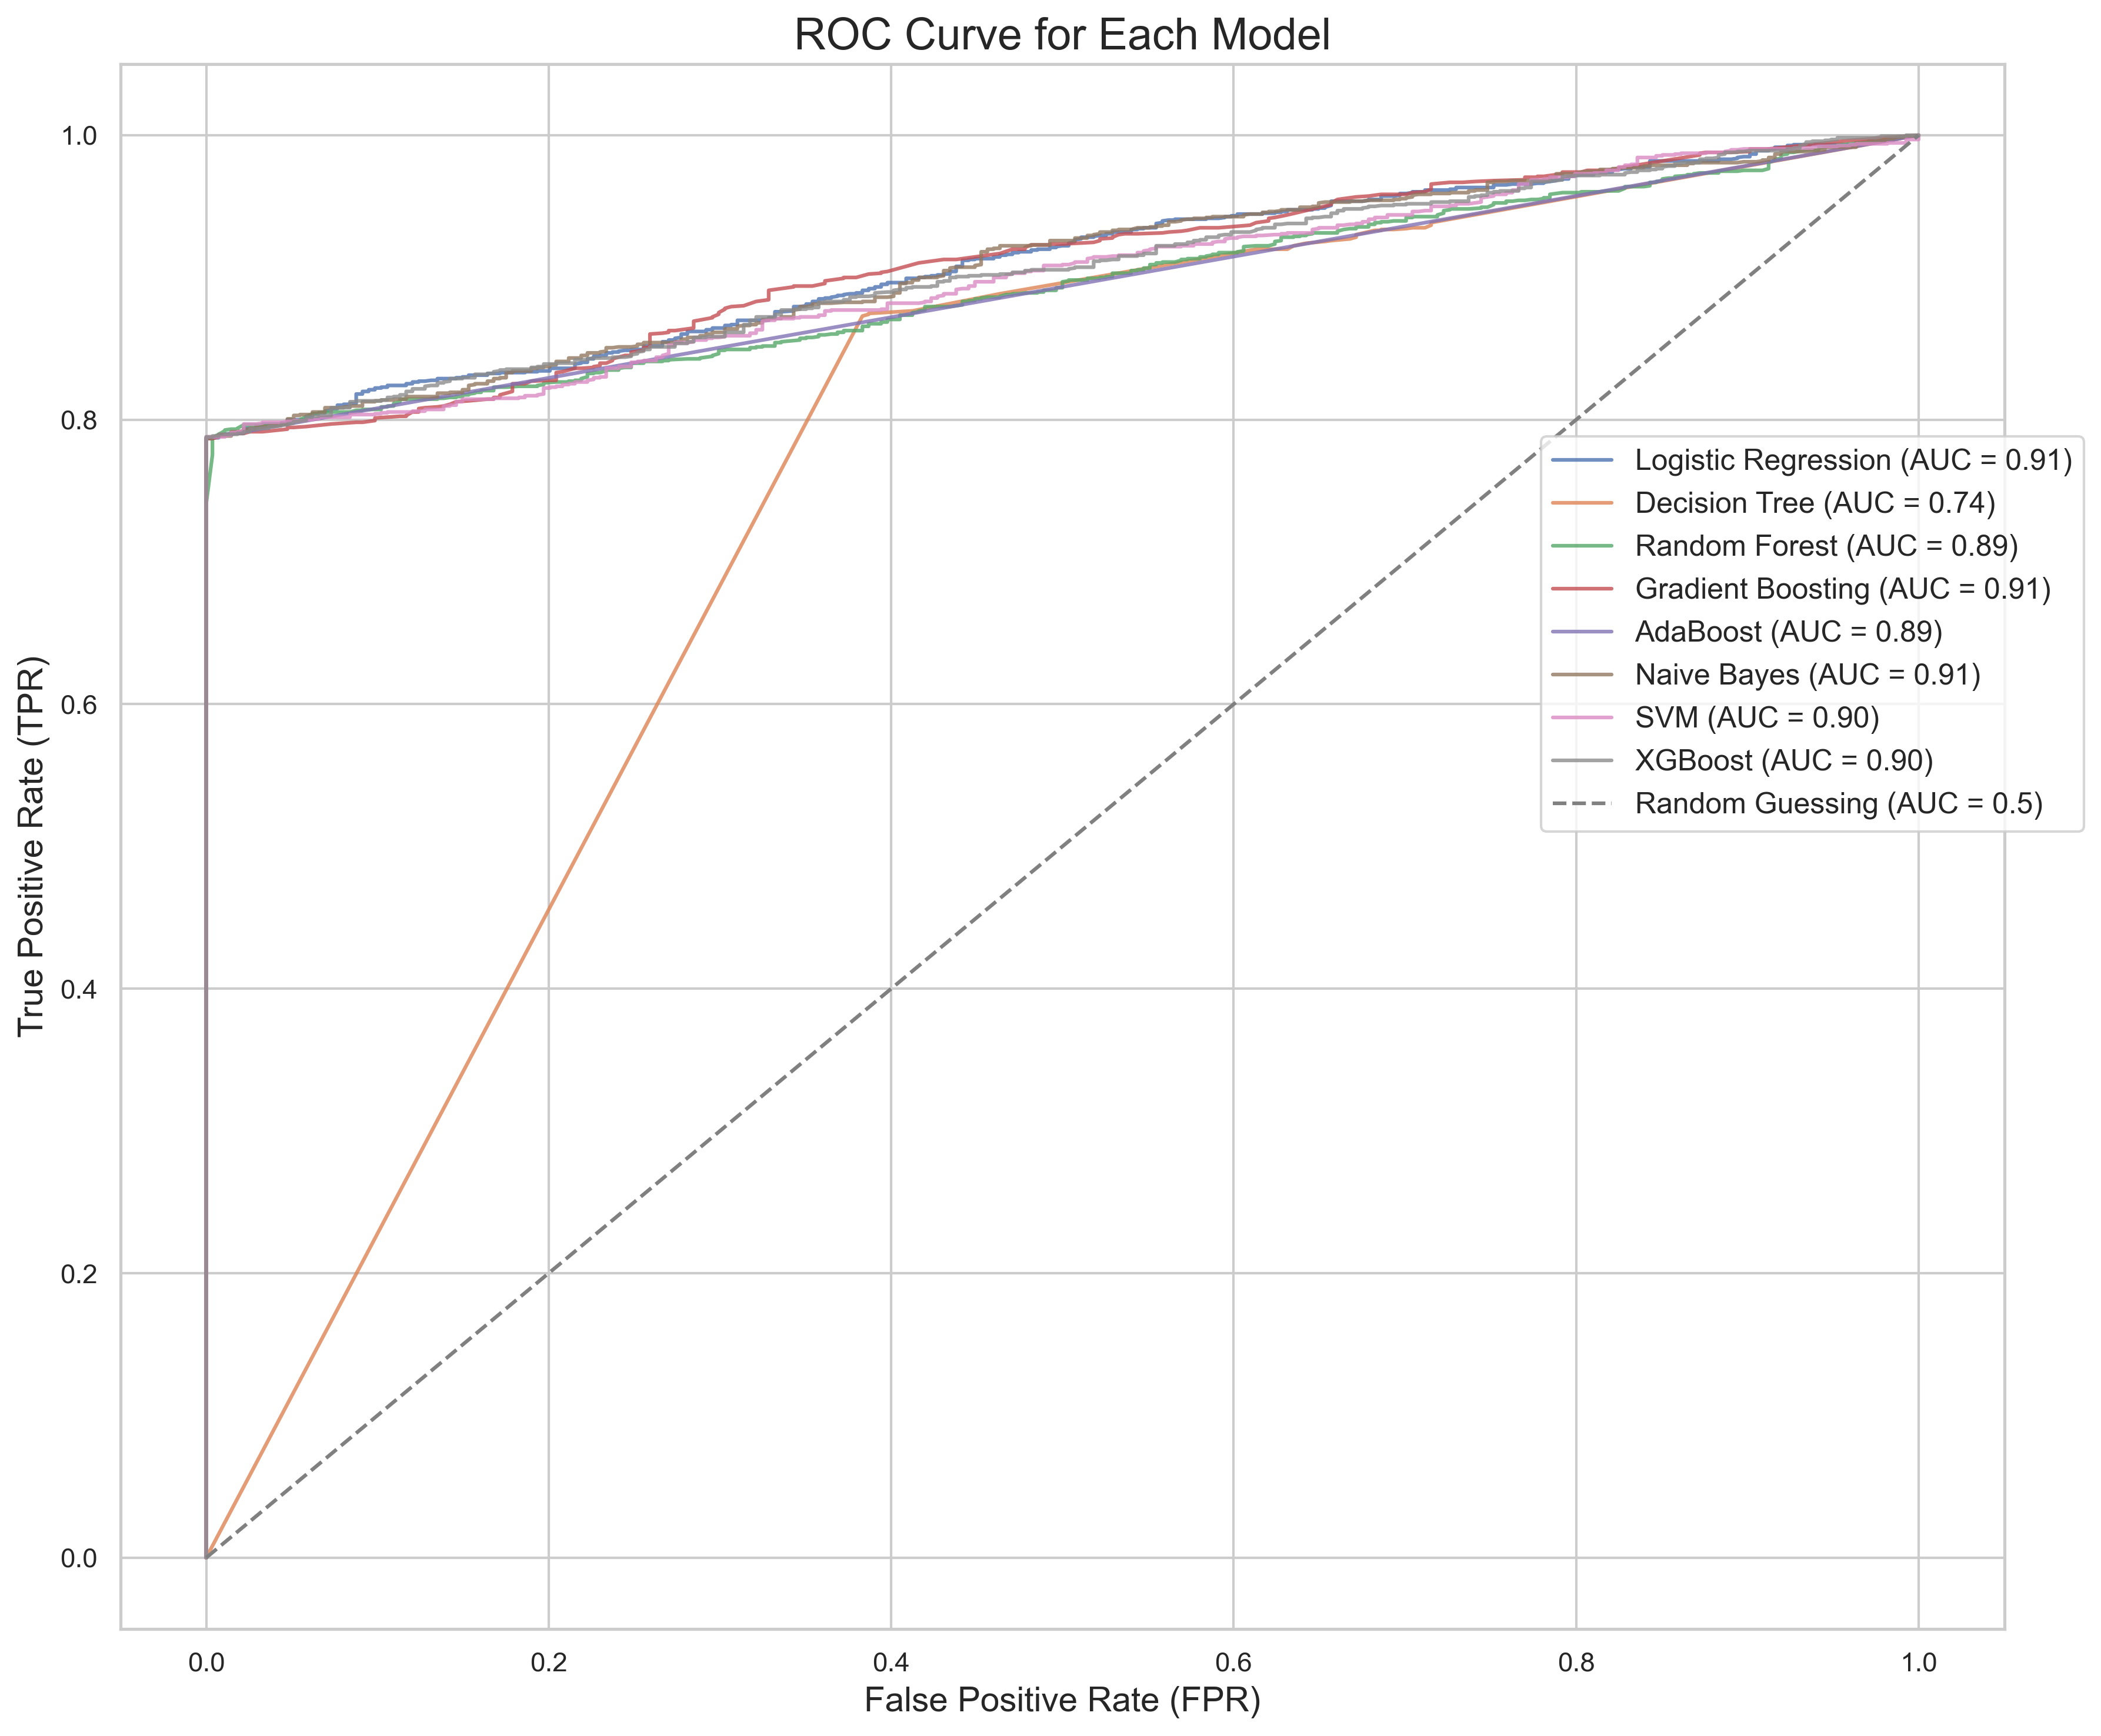

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns

plt.figure(figsize=(12, 10), dpi=300)

sns.set(style="whitegrid")

for model_name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    
    y_prob = model.predict_proba(X_test)[:, 1]  

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    
    auc = roc_auc_score(y_test, y_prob)
    
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})', 
             lw=1.5, linestyle='-', alpha=0.8) 
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing (AUC = 0.5)')

plt.title('ROC Curve for Each Model', fontsize=18)
plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)

plt.grid(True)
plt.legend(loc='lower right', fontsize=12, bbox_to_anchor=(1.05, 0.5))

plt.tight_layout()
plt.savefig('roc_auc_curve_comparison_reduced_lines.png', dpi=300, bbox_inches='tight')
plt.show()


In [35]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(probability=True), 
    'XGBoost': XGBClassifier(enable_categorical=True)
}

param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1, 10, 100],
        'penalty': ['l2'],
        'solver': ['liblinear', 'saga']
    },
    'Decision Tree': {
        'max_depth': [5, 10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'criterion': ['gini', 'entropy']
    },
    'Random Forest': {
        'n_estimators': [50, 100, 150, 200],
        'max_depth': [5, 10, 20, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2, 4]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'max_depth': [3, 5, 10]
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.1, 0.5, 1.0]
    },
    'Naive Bayes': {
        'var_smoothing': [1e-9, 1e-8, 1e-7]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 10],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0]
    }
}

In [36]:
best_models = {}
model_performance = {}

for model_name, model in models.items():
    param_dist = param_grids.get(model_name, {})
    
    if param_dist:
        total_combinations = np.prod([len(values) for values in param_dist.values()])
        n_iter = min(total_combinations, 20) 

        random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, 
                                           n_iter=n_iter, cv=5, n_jobs=-1, verbose=1, random_state=42)
        random_search.fit(X_train_resampled, y_train_resampled)
        
        best_models[model_name] = random_search.best_estimator_
        print(f"Best Hyperparameters for {model_name}:", random_search.best_params_)
        print(f"Best Cross-Validation Score for {model_name}:", random_search.best_score_)
        
        best_model = random_search.best_estimator_
        test_score = best_model.score(X_test, y_test)
        print(f"Test Score of Best {model_name} Model:", test_score)

        y_pred = best_model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        if hasattr(best_model, 'predict_proba'):
            roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])
        else:
            roc_auc = None

        model_performance[model_name] = {
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1,
            "ROC AUC": roc_auc
        }
for model_name, performance in model_performance.items():
    print(f"\nPerformance for {model_name}:")
    for metric, score in performance.items():
        print(f"{metric}: {score}")


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Hyperparameters for Logistic Regression: {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.1}
Best Cross-Validation Score for Logistic Regression: 0.890680944592166
Test Score of Best Logistic Regression Model: 0.8169596690796277
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters for Decision Tree: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'criterion': 'gini'}
Best Cross-Validation Score for Decision Tree: 0.9019912856557276
Test Score of Best Decision Tree Model: 0.8304033092037229
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20}
Best Cross-Validation Score for Random Forest: 0.8961859109383555
Test Score of Best Random Forest Model: 0.8252326783867632
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameter

In [37]:
model_performance_df = pd.DataFrame(model_performance).T
print("\nModel Performance Comparison with Hyperparameter Tuning:")
print(model_performance_df) 


Model Performance Comparison with Hyperparameter Tuning:
                     Accuracy  Precision    Recall  F1 Score   ROC AUC
Logistic Regression  0.816960   1.000000  0.786747  0.880647  0.909801
Decision Tree        0.830403   0.959310  0.837952  0.894534  0.851709
Random Forest        0.825233   0.934297  0.856627  0.893777  0.895352
Gradient Boosting    0.849018   0.912048  0.912048  0.912048  0.900840
AdaBoost             0.816960   1.000000  0.786747  0.880647  0.893373
Naive Bayes          0.816960   1.000000  0.786747  0.880647  0.908190
SVM                  0.816960   1.000000  0.786747  0.880647  0.899291
XGBoost              0.846432   0.933800  0.883735  0.908078  0.904593


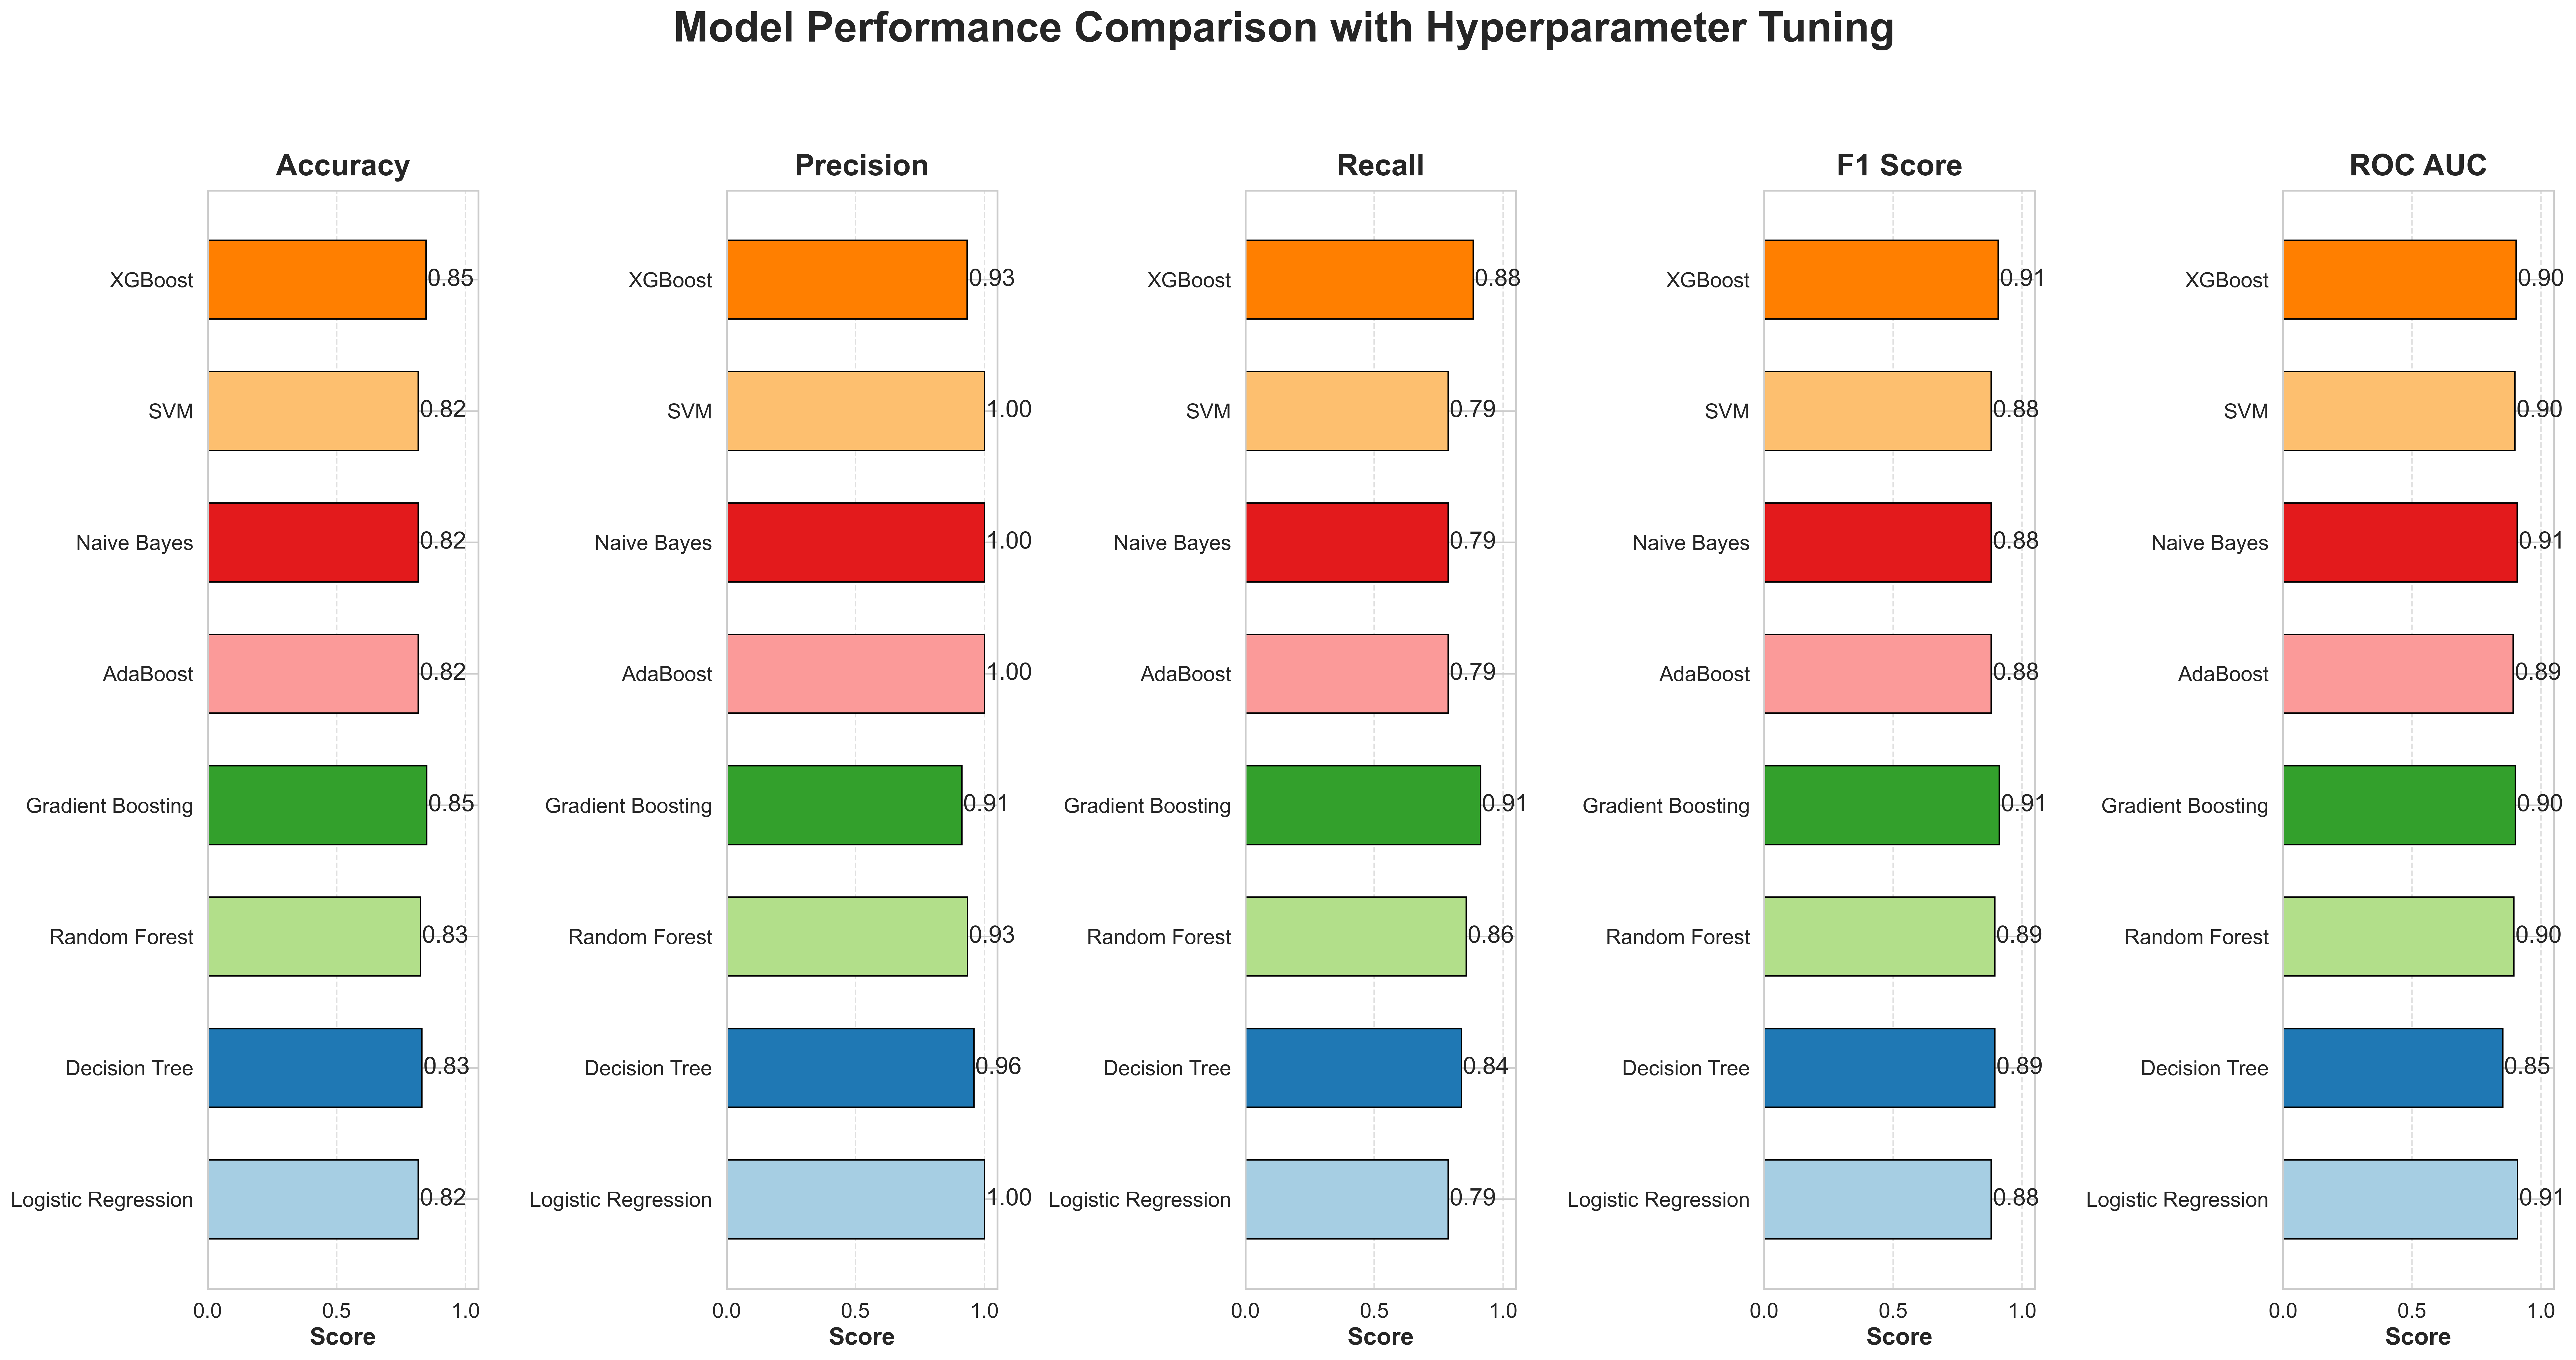

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
models = model_performance_df.index
colors = sns.color_palette("Paired", n_colors=len(models))

fig, axes = plt.subplots(nrows=1, ncols=len(metrics), figsize=(24, 12), dpi=400)

for i, metric in enumerate(metrics):
    ax = axes[i]
    values = model_performance_df[metric]
    
    ax.barh(models, values, color=colors, edgecolor='black', height=0.6)
    
    for j, val in enumerate(values):
        ax.text(val + 0.005, j, f'{val:.2f}', va='center', fontsize=16)  
    
    ax.set_title(metric, fontsize=20, fontweight='bold', pad=10) 
    ax.set_xlim(0, 1.05)
    ax.set_xlabel('Score', fontsize=16, fontweight='bold') 
    ax.tick_params(axis='y', labelsize=14)  
    ax.tick_params(axis='x', labelsize=14) 
    ax.grid(axis='x', linestyle='--', alpha=0.6)

plt.suptitle('Model Performance Comparison with Hyperparameter Tuning', fontsize=28, fontweight='bold', y=1.05) 
plt.tight_layout()
plt.savefig("model_performance_horizontal_subplots_hd_large_fonts.png", dpi=400, bbox_inches='tight')
plt.show()

In [39]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=100)
gb = GradientBoostingClassifier(n_estimators=100)
ab = AdaBoostClassifier(n_estimators=100)
xgb = XGBClassifier(enable_categorical=True)
svc = SVC(probability=True)  

In [40]:
voting_clf_soft = VotingClassifier(estimators=[
    ('lr', lr),
    ('df', dt),
    ('rf', rf), 
    ('xgb', xgb),
    ('svc', svc),
    
], voting='soft')
voting_clf_hard = VotingClassifier(estimators=[
    ('lr', lr),
    ('df', dt),
    ('rf', rf),
    ('xgb', xgb),
    ('svc', svc),
], voting='hard')

In [41]:
stacking_clf = StackingClassifier(
    estimators=[
        ('lr', lr),
        ('dt', dt),
        ('rf', rf),
        ('gb', gb),
        ('ab', ab),
        ('svc', svc)
    ],
    final_estimator=LogisticRegression() 
)

In [42]:
voting_clf_soft.fit(X_train_resampled, y_train_resampled)
y_pred_voting_soft = voting_clf_soft.predict(X_test)

voting_clf_hard.fit(X_train_resampled, y_train_resampled)
y_pred_voting_hard = voting_clf_hard.predict(X_test)

stacking_clf.fit(X_train_resampled, y_train_resampled)
y_pred_stacking = stacking_clf.predict(X_test)

In [43]:

def get_metrics(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    return accuracy, precision, recall, f1, roc_auc

In [44]:
metrics_voting_soft = get_metrics(y_test, y_pred_voting_soft)
metrics_voting_hard = get_metrics(y_test, y_pred_voting_hard)
metrics_stacking = get_metrics(y_test, y_pred_stacking)

ensemble_results = {
    "Voting Classifier (Soft)": metrics_voting_soft,
    "Voting Classifier (Hard)": metrics_voting_hard,
    "Stacking Classifier": metrics_stacking,
}

ensemble_results_df = pd.DataFrame(ensemble_results, index=["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"])

print("Ensemble Learning Models Performance with Train-Test Split:")
print(ensemble_results_df)

Ensemble Learning Models Performance with Train-Test Split:
           Voting Classifier (Soft)  Voting Classifier (Hard)  \
Accuracy                   0.832472                  0.828335   
Precision                  0.957534                  0.958564   
Recall                     0.842169                  0.836145   
F1 Score                   0.896154                  0.893179   
ROC AUC                    0.807946                  0.808583   

           Stacking Classifier  
Accuracy              0.837125  
Precision             0.942143  
Recall                0.863253  
F1 Score              0.900975  
ROC AUC               0.771043  


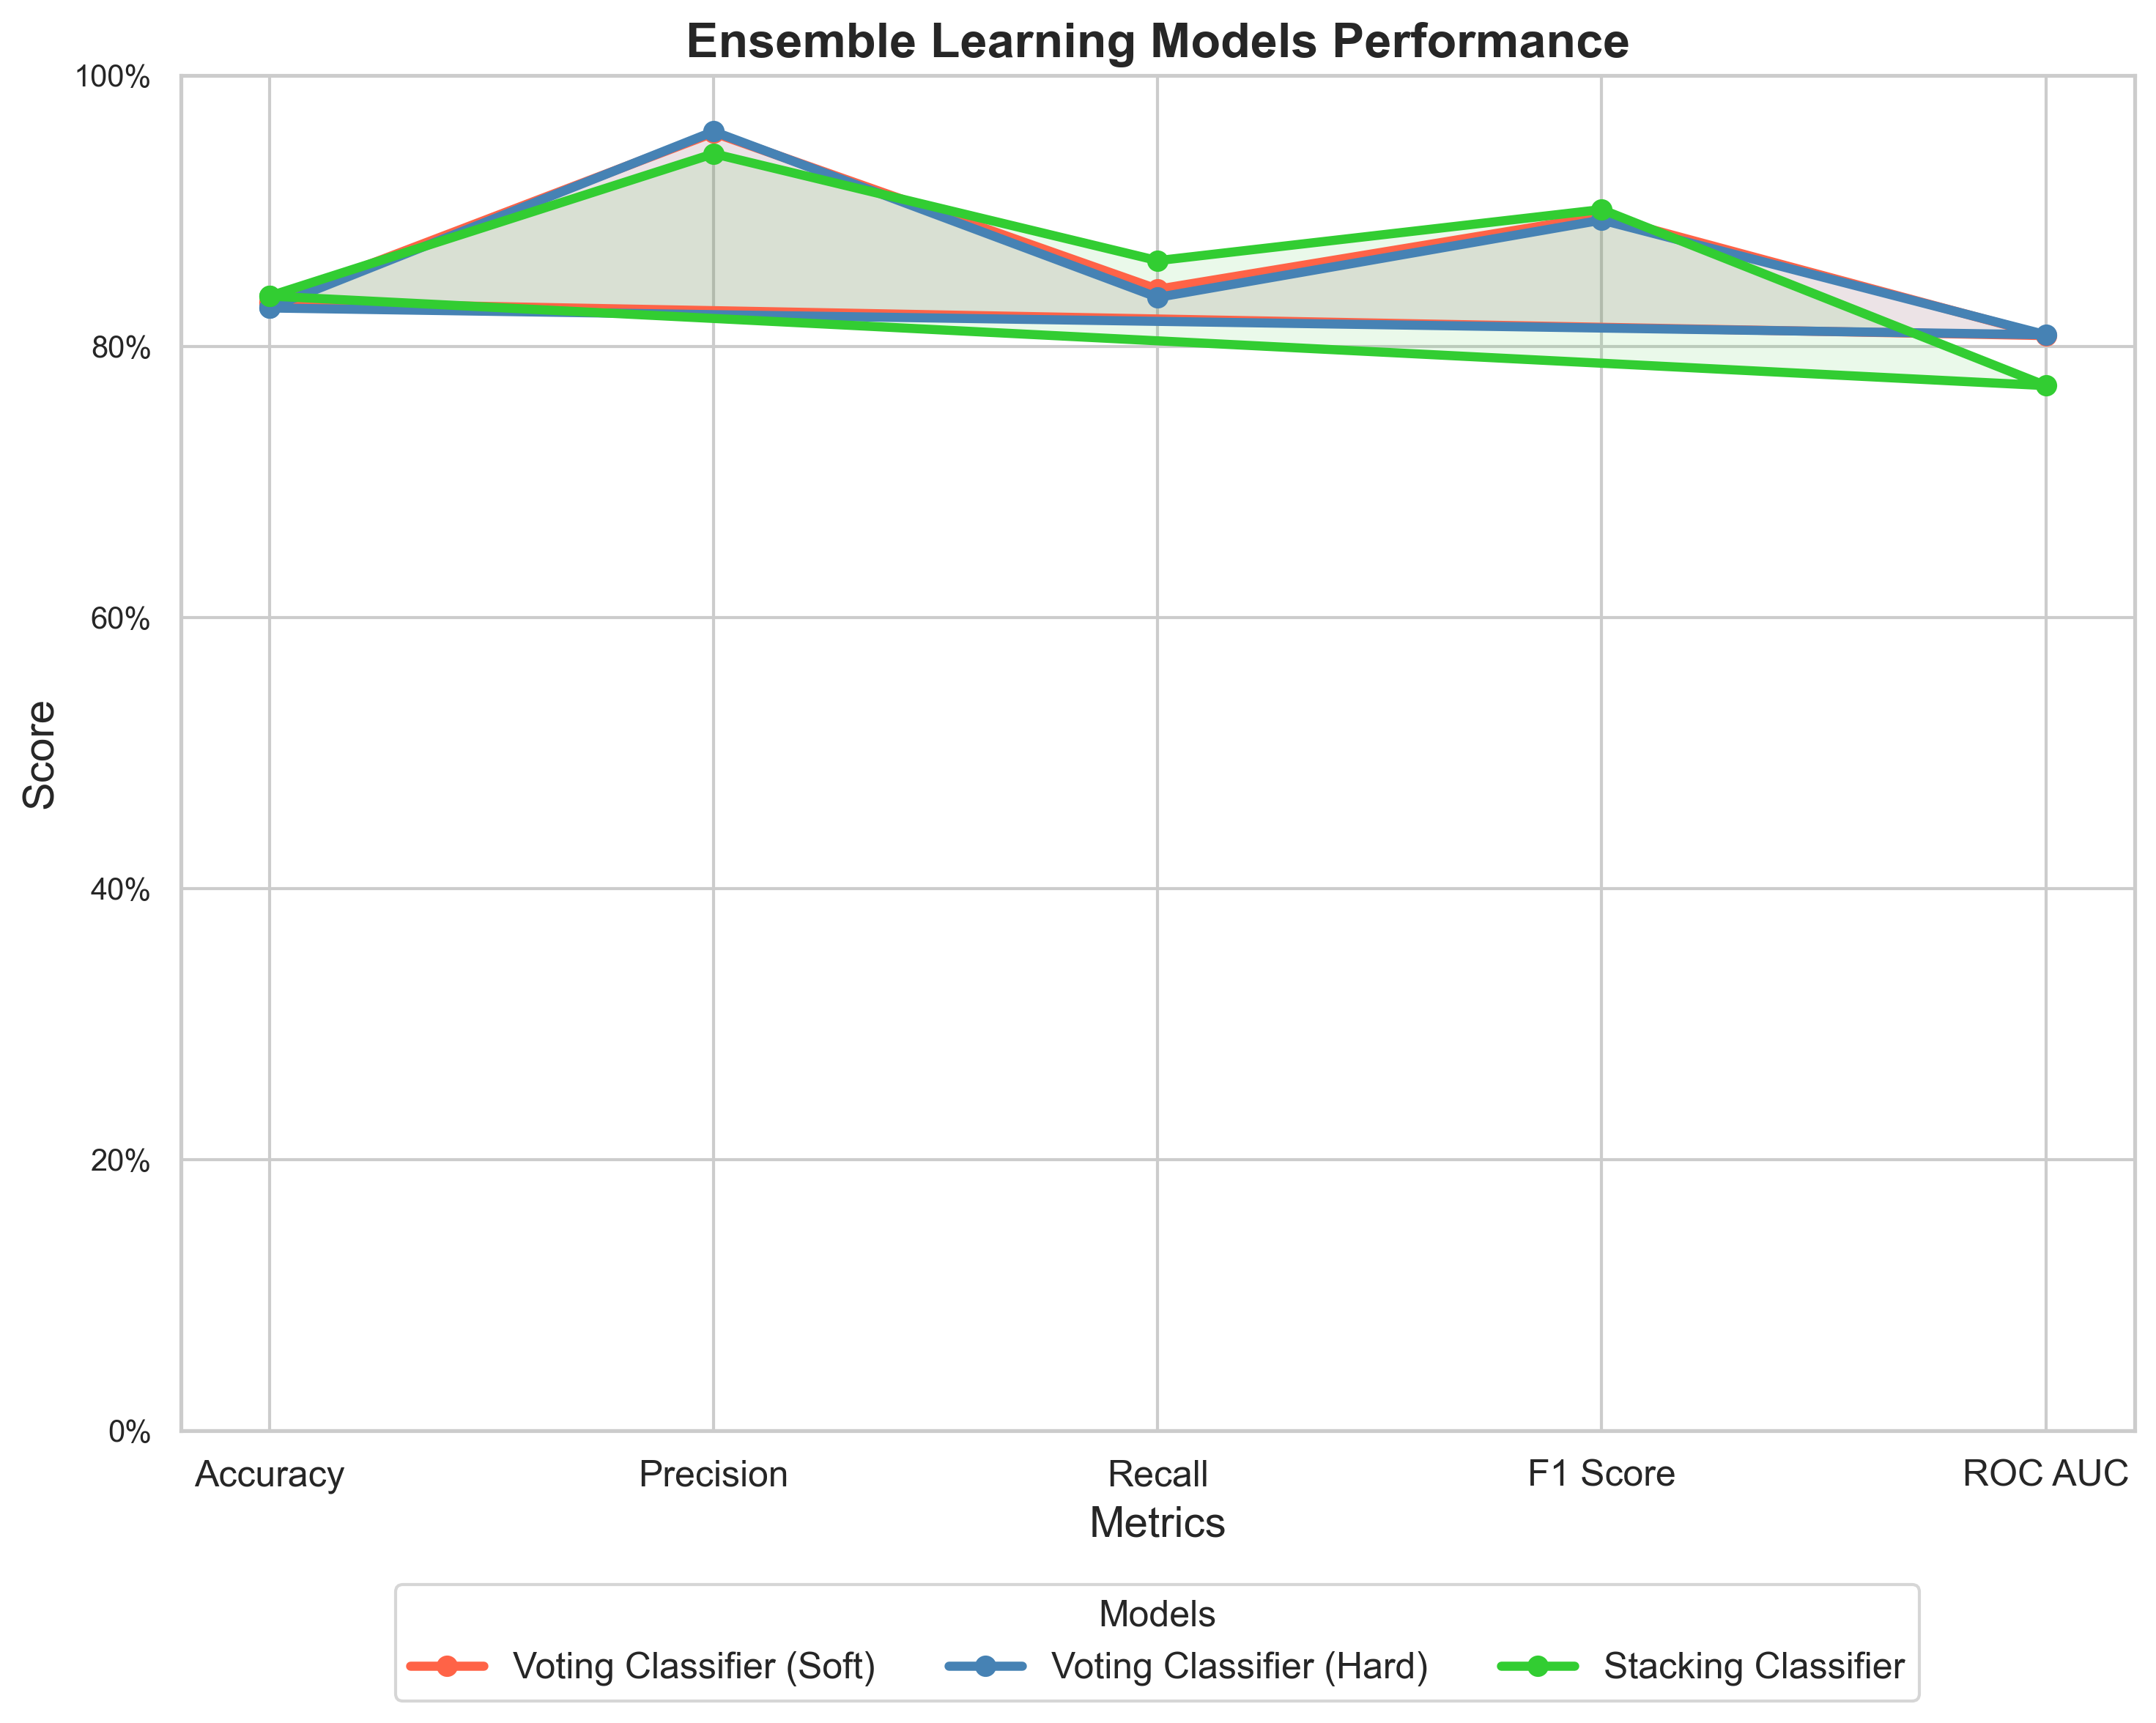

In [45]:
ensemble_results_df = pd.DataFrame(ensemble_results, index=["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"])

sns.set(style="whitegrid")

categories = ensemble_results_df.index.tolist()
N = len(categories)

values = ensemble_results_df.values.T

angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()

values = np.concatenate((values, values[:,[0]]), axis=1)
angles += angles[:1]  

plt.figure(figsize=(10, 8), dpi=300)  

colors = ['#FF6347', '#4682B4', '#32CD32'] 

for i, model_name in enumerate(ensemble_results_df.columns):
    plt.fill(angles, values[i], alpha=0.1, color=colors[i])  
    
    plt.plot(angles, values[i], label=model_name, linewidth=3, linestyle='solid', marker='o', color=colors[i])

plt.title("Ensemble Learning Models Performance", fontsize=16, fontweight='bold')
plt.xlabel('Metrics', fontsize=14)
plt.ylabel('Score', fontsize=14)

plt.xticks(angles[:-1], categories, fontsize=12)
plt.yticks(np.linspace(0, 1, 6), [f'{i * 20}%' for i in range(6)], fontsize=10)
plt.ylim(0, 1)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3, title="Models", fontsize=12)

plt.tight_layout()

save_path = "ensemble_learning_radar_chart_with_legend_bottom.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')

plt.show()

In [46]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier()

In [47]:
importances = random_forest.feature_importances_  
features = X_train.columns  

In [48]:
import numpy as np

yes_count = np.sum(y_test == 1) 
no_count = np.sum(y_test == 0)  

print(f"Number of 'Yes': {yes_count}")
print(f"Number of 'No': {no_count}")


Number of 'Yes': 1660
Number of 'No': 274


pip install shap xgboost


In [49]:
import shap
import xgboost as xgb

xgb_model = XGBClassifier(enable_categorical=True)
xgb_model.fit(X_train_resampled, y_train_resampled)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

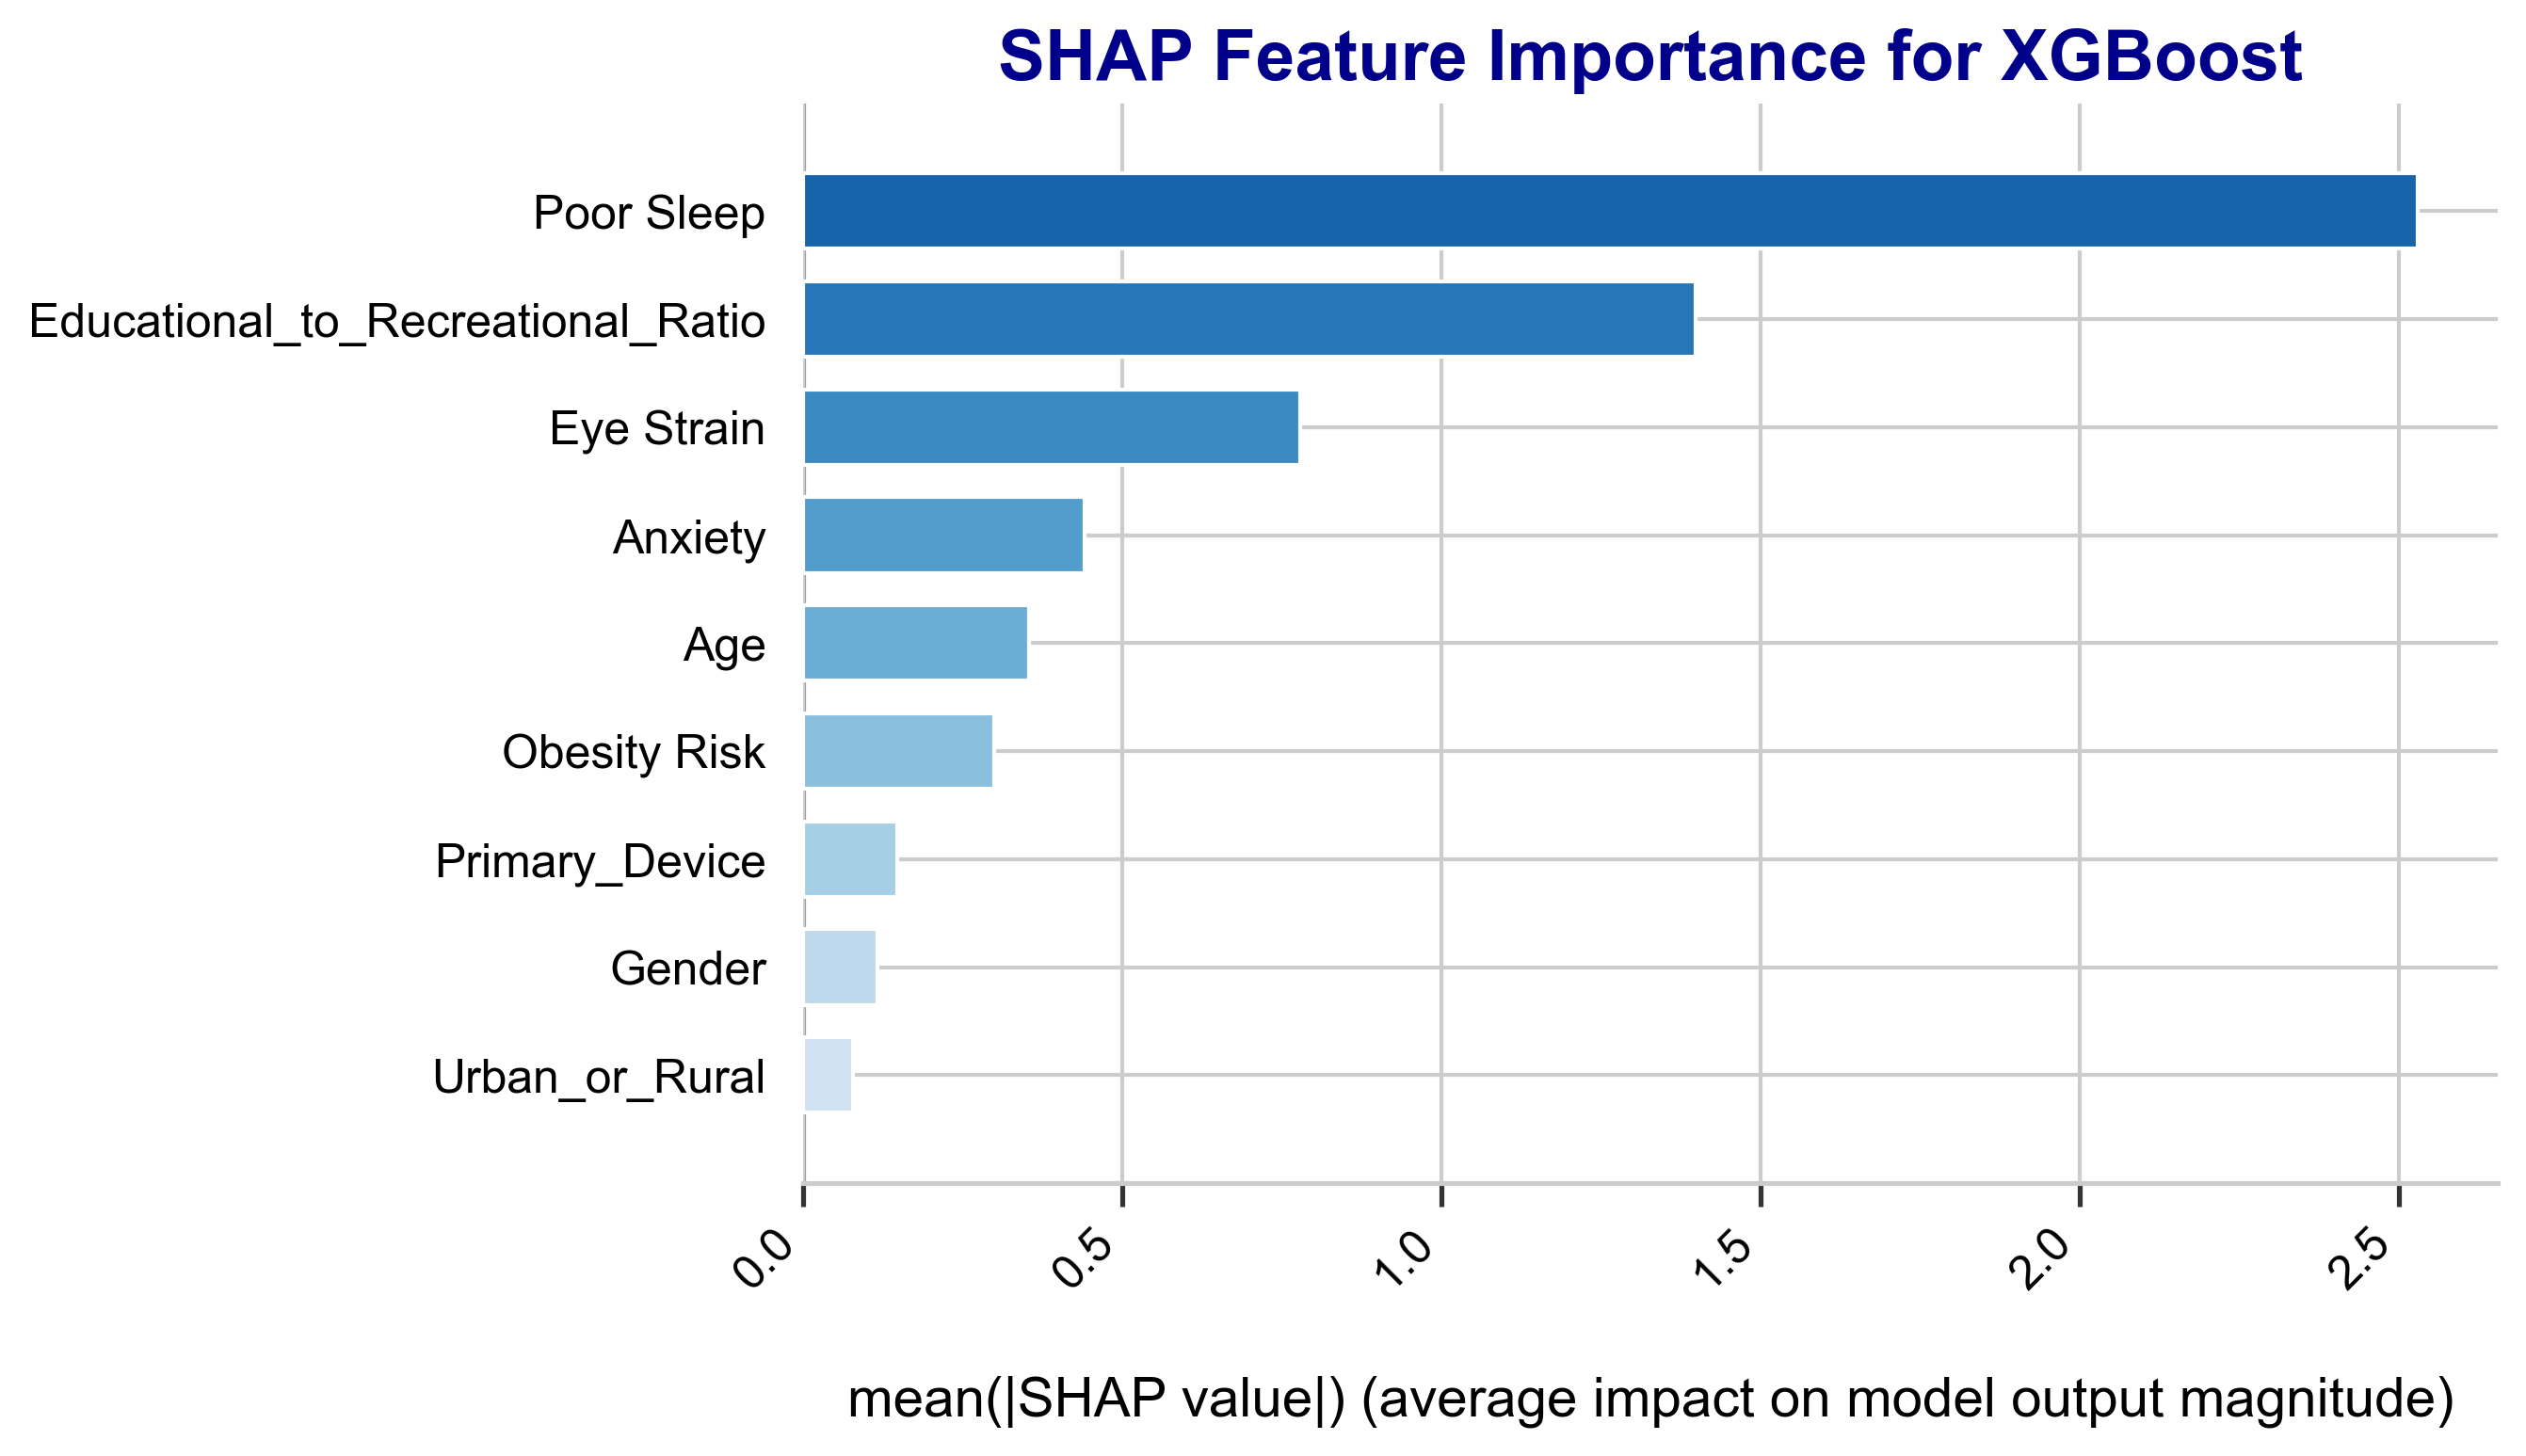

In [50]:
import shap
import matplotlib.pyplot as plt
import numpy as np

explainer = shap.TreeExplainer(xgb_model)

shap_values = explainer.shap_values(X_train_resampled)

plt.figure(figsize=(20, 12), dpi=300) 
shap.summary_plot(shap_values, X_train_resampled, plot_type="bar", show=False)

ax = plt.gca() 
bars = ax.containers[0]

colors = plt.cm.Blues(np.linspace(0.2, 0.8, len(bars)))  
for bar, color in zip(bars, colors):
    bar.set_facecolor(color) 

plt.title("SHAP Feature Importance for XGBoost", fontsize=18, fontweight='bold', color='darkblue')

plt.xticks(rotation=45, ha='right', fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')

ax.set_xlabel('mean(|SHAP value|) (average impact on model output magnitude)', fontsize=14, labelpad=20, color='black')

plt.subplots_adjust(right=0.85, left=0.1, top=0.9, bottom=0.15)

plt.savefig("shap_feature_importance_hd_colored.png", dpi=300, bbox_inches='tight')

plt.show()

In [53]:
!pip install --upgrade scikit-learn

   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.9 MB 4.2 MB/s eta 0:00:03
   -------- ------------------------------- 1.8/8.9 MB 7.7 MB/s eta 0:00:01
   ------------------- -------------------- 4.5/8.9 MB 8.7 MB/s eta 0:00:01
   ------------------------- -------------- 5.8/8.9 MB 8.6 MB/s eta 0:00:01
   ------------------------------------- -- 8.4/8.9 MB 9.0 MB/s eta 0:00:01
   ---------------------------------------- 8.9/8.9 MB 7.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.1 which is incompatible.


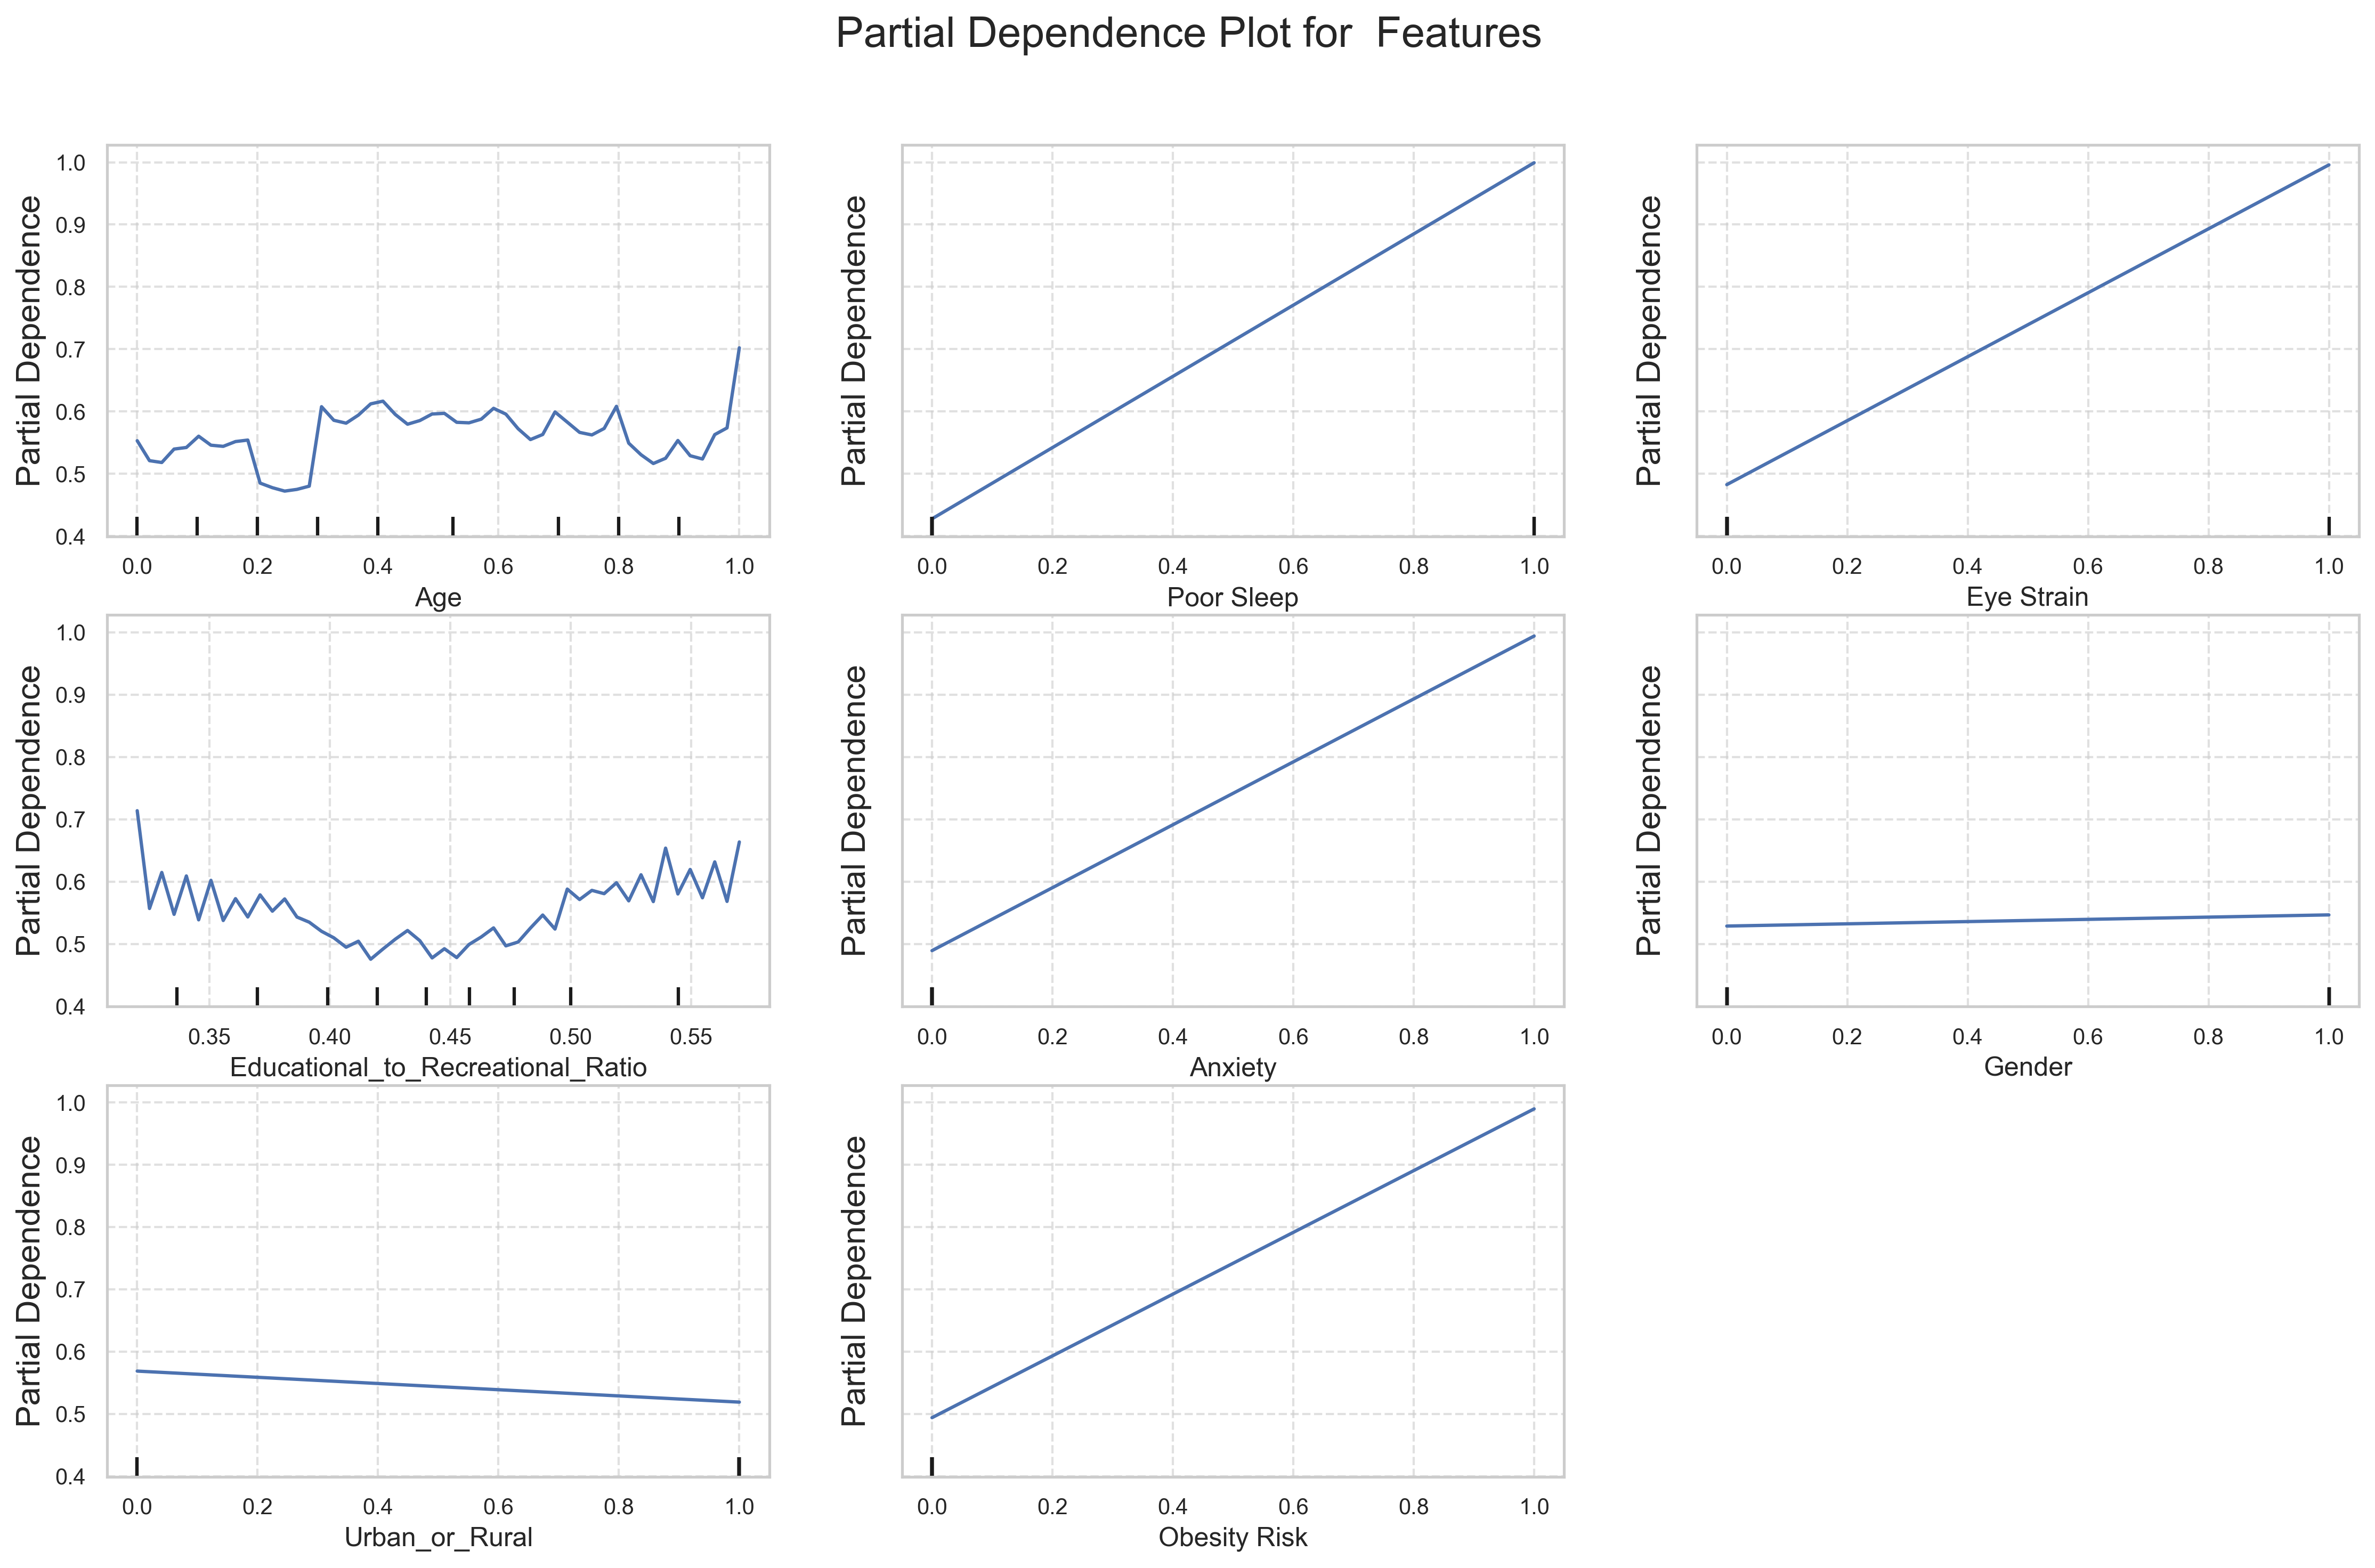

In [54]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay
random_forest = RandomForestClassifier()
random_forest.fit(X_train_resampled, y_train_resampled)

features_to_plot = ['Age', 'Poor Sleep', 'Eye Strain', 'Educational_to_Recreational_Ratio', 'Anxiety', 'Gender', 'Urban_or_Rural','Obesity Risk']

fig, ax = plt.subplots(figsize=(15, 10), dpi=300) 

display = PartialDependenceDisplay.from_estimator(
    random_forest,
    X_train_resampled,
    features_to_plot,
    kind='average', 
    subsample=1000,  
    n_jobs=-1,      
    grid_resolution=50,
    random_state=42,
    ax=ax
)

plt.suptitle("Partial Dependence Plot for  Features", fontsize=19)
plt.tight_layout(rect=[0, 0, 1, 0.96])  

for axis in fig.get_axes(): 
    axis.set_ylabel('Partial Dependence', fontsize=15)
    axis.tick_params(axis='both', which='major', labelsize=10)
    axis.grid(True, linestyle='--', alpha=0.6)

plt.savefig("partial_dependence_plot_high_resolution.png", dpi=300, bbox_inches='tight')

plt.show()

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters for XGBoost: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.2, 'colsample_bytree': 1.0}


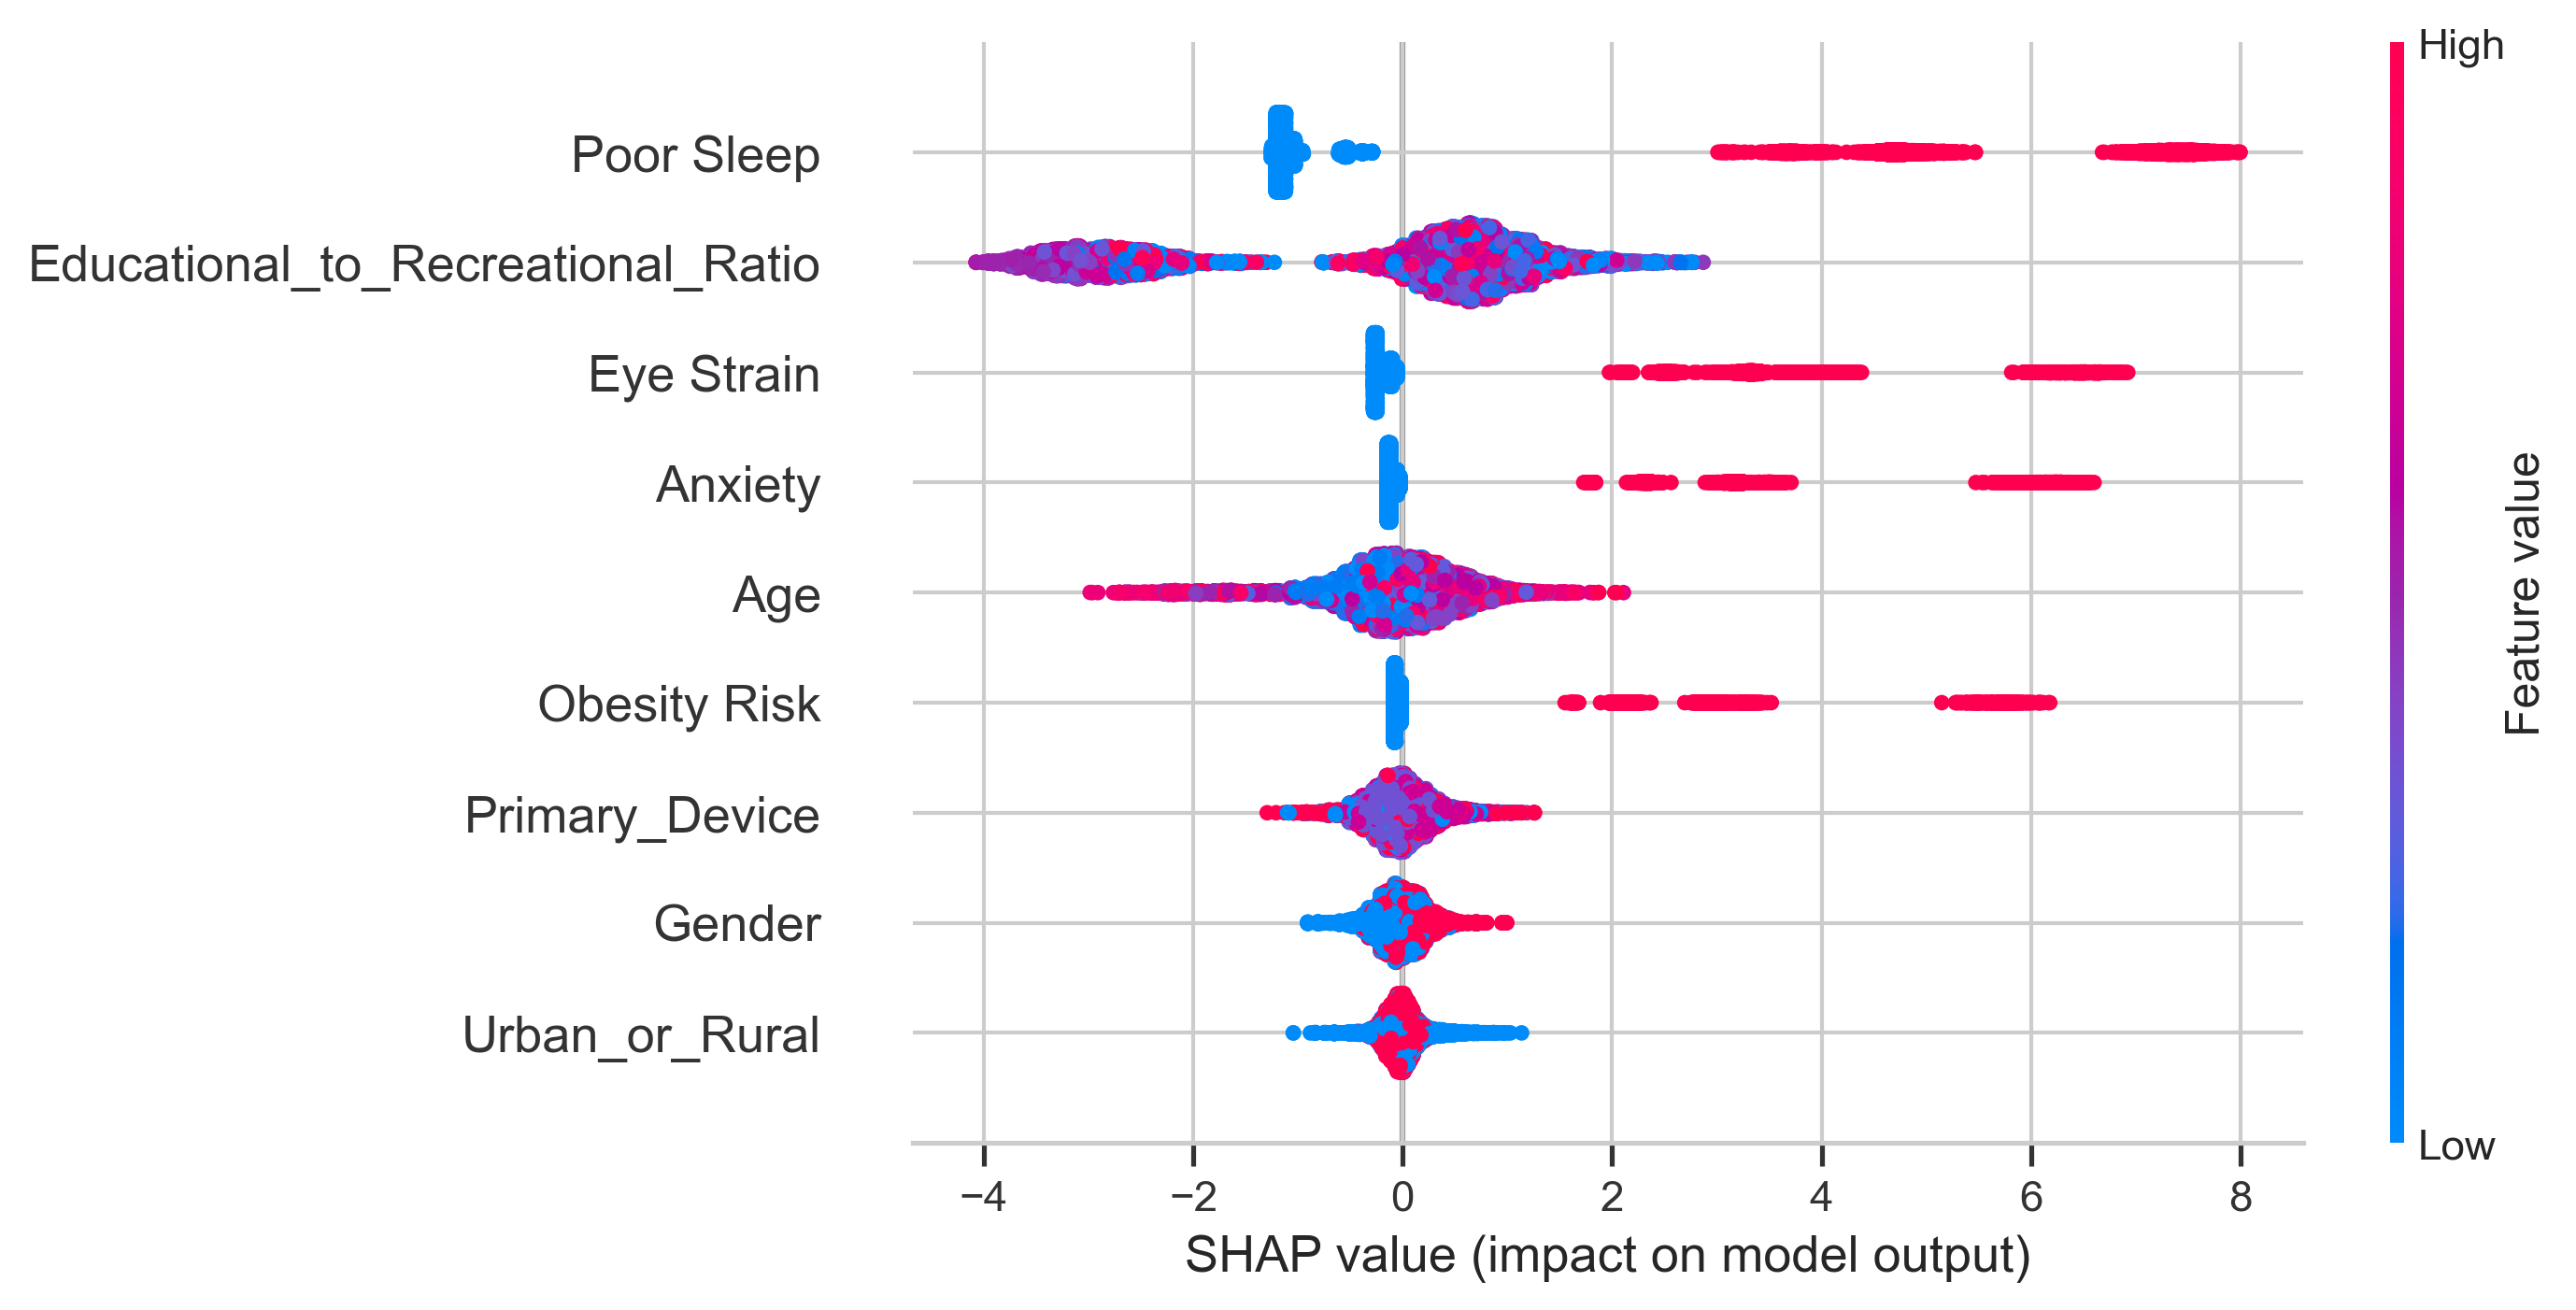

<Figure size 640x480 with 0 Axes>

In [55]:
import shap
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
xgb_model = xgb.XGBClassifier(enable_categorical=True)

param_dist = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}
random_search = RandomizedSearchCV(
    estimator=xgb_model, 
    param_distributions=param_dist, 
    n_iter=10, 
    cv=5, 
    n_jobs=-1, 
    verbose=1, 
    random_state=42
)

random_search.fit(X_train_resampled, y_train_resampled)

best_xgb_model = random_search.best_estimator_

print(f"Best Hyperparameters for XGBoost: {random_search.best_params_}")

explainer = shap.TreeExplainer(best_xgb_model)

shap_values = explainer.shap_values(X_train_resampled)

shap_values_explained = shap.Explanation(values=shap_values, 
                                         base_values=explainer.expected_value, 
                                         data=X_train_resampled)
shap.initjs()

plt.figure(figsize=(14, 10), dpi=300) 
shap.plots.beeswarm(shap_values_explained)

plt.tight_layout()

plt.savefig("shap_beeswarm.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()